# PROJETO DE ANÁLISE DOS MICRODADOS DO ENEM 2021

## IMPORTANDO BIBLIOTECAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import multiprocessing as mp
from joblib import Parallel, delayed
# from google.colab import drive
# drive.mount('/content/drive')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sys
import warnings
warnings.filterwarnings("ignore")

## DEFININDO PARAMETROS PARA A PAGINA WEB DO JUPYTER

In [3]:
sns.set()
pd.options.display.max_columns = 500
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10, 5]
%reload_ext nb_black

<IPython.core.display.Javascript object>

## COLENTANDO OS DADOS

In [4]:
# Lendo o dataset oficialmente e fazendo o primeiro head
data = pd.read_csv('DADOS//MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')
data.head(3)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B


<IPython.core.display.Javascript object>

In [5]:
# relendo o dataset para uma hipotese em especifico
dados = pd.read_csv('DADOS//MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')
data.head(3)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B


<IPython.core.display.Javascript object>

## OVERVIEW

In [6]:
data.sample(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
598742,210051715282,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600303,Macapá,16,AP,1,1,1,1,912.0,882.0,891.0,901.0,437.3,541.7,497.1,479.9,ECDDEEBEEBCDBBBEEBABEEDDACACABCCADAECECBCCEAC,CEDBAAEBEAABAEBBECEBBCEDBBDEEDCABDBEBEBACBADA,AEEAD99999DCBADDACDAEBEACBCCCDADBDCBDAACDCCDCB...,ECDDEECEBDCBEDECBDDCCEBABEBDDCCABEBCDAEEDDACC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,80.0,120.0,120.0,560.0,E,F,D,D,5.0,H,A,C,D,B,A,B,A,B,A,B,A,A,C,A,B,C,B,B,B
331927,210051111307,2021,2,M,1,1,1,2,0,2,1.0,0,2611606.0,Recife,26.0,PE,2.0,1.0,1.0,2611606,Recife,26,PE,1,1,1,1,911.0,880.0,890.0,902.0,420.0,367.0,306.0,383.1,CDABDCCCBABBCDCBAADCDCDBEADBBDDCCBDBBBDBCDBBC,CADBCBBCDBCC*CBBBDDBBBDBBBDADCBCBACBCACDCABDB,99999BBCADDBCDBBACCDDDCBBDCBCCDDCCBDBCBDABBCCA...,BACCCDDBDCBCDDBDCACBCBBADAACCDCDDBCACBACADBDB,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,6.0,0.0,0.0,0.0,0.0,0.0,0.0,C,B,B,F,4.0,B,A,B,C,A,A,B,A,A,A,B,A,A,C,A,A,E,A,A,B
61881,210052153235,2021,2,F,1,1,1,2,0,3,1.0,0,5300108.0,Brasília,53.0,DF,4.0,1.0,1.0,5300108,Brasília,53,DF,1,1,1,1,909.0,881.0,892.0,899.0,579.8,648.1,637.4,592.8,ACECAAAEABBACCECCDECEEEDDBDDECBCDCEACDCDAAAAE,BEECCACAEACADAEAAAAADDEBBECDBABBAAEDBBADCABBA,ABBAC99999DDBCDACEBEDCDDCBEBADDDBEADCCEABDADAC...,CBDEAEBDBDEBDBCCDEDCBEBEDABABCEDCCCBCDCDDBDDD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,200.0,120.0,120.0,200.0,780.0,F,G,D,F,4.0,O,B,D,D,C,A,C,C,B,A,B,B,B,C,B,B,E,A,D,B
170783,210052615267,2021,2,F,1,1,1,2,0,2,1.0,0,3533908.0,Olímpia,35.0,SP,2.0,1.0,1.0,3533908,Olímpia,35,SP,1,1,1,1,909.0,881.0,892.0,899.0,453.3,612.0,596.7,625.1,EEECBBBEADCDCACCEECBABCDECCAEBCCBBDBCDBDEBAAE,BCEBCAECDABBCACAAAAEDDEBBDBDBBAAACADBBADBEBDD,99999BAECADDBDCACEBCDBBDCDDBADBABDADECEAACADAB...,EEDEAACDCADCBBCCEEDDCEAEEDEABEBEBCCCADBBDDEDB,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,E,E,C,D,3.0,E,A,B,C,B,A,B,B,B,A,B,A,A,B,B,A,D,A,B,B
341822,210054178269,2021,3,F,1,1,1,2,0,2,1.0,0,5211503.0,Itumbiara,52.0,GO,4.0,1.0,1.0,5211503,Itumbiara,52,GO,1,1,1,1,909.0,881.0,892.0,899.0,476.8,608.9,563.3,459.8,BEDCABBEADDECCEBADEEAEECCDEE*ECBDAEDCEDDBBAAC,BEECCACACAEBEAECAAADADEBBDDBBEABBEECBBBECCCDD,ABAAC99999CDBBCDBADBACDCCBDEDDDDBDDDEBEABCAAAC...,EACEDBDCCEBCDEBAECDBCDAEBBDCADDCCBDAEBDCAEBCB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,120.0,100.0,580.0,G,G,E,D,4.0,P,A,D,C,C,A,B,A,B,A,B,A,A,B,B,A,E,B,D,B
732910,210053

<IPython.core.display.Javascript object>

In [7]:
# Lendo o tamanho do dataset
data.shape

(1048575, 76)

<IPython.core.display.Javascript object>

In [8]:
# Visualizando todas as colunas
data.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

<IPython.core.display.Javascript object>

In [9]:
# Retirando um parametro geral do dataset
data.describe(include='all')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,1.048575e+06,1048575.0,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,444720.000000,1.048575e+06,3.062480e+05,306248,306248.000000,306248,306248.000000,306248.000000,306248.00000,1.048575e+06,1048575,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,781258.000000,819301.000000,819301.000000,781258.000000,781258.000000,819301.000000,819301.000000,781258.000000,781258,819301,819301,781258,1.048575e+06,781258,819301,819301,781258,819301.000000,819301.000000,819301.000000,819301.000000,819301.000000,819301.000000,819301.000000,1048574,1048574,1048574,1048574,1.048574e+06,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4868,NaN,27,NaN,NaN,NaN,NaN,1711,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780975,817535,818589,780918,NaN,8,8,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,6,6,NaN,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fortaleza,NaN,CE,NaN,NaN,NaN,NaN,São Paulo,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.............................................,.............................................,.....99999.......................................,.............................................,NaN,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,NaN,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,A,A,B
freq,NaN,NaN,NaN,707825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17095,NaN,56604,NaN,NaN,NaN,NaN,38032,NaN,136174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,1349,370,109,NaN,196423,206618,206341,196423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300291,371916,249507,461798,NaN,334613,972854,716783,538048,581079,798724,987755,590608,610555,926732,550146,1022434,832340,714083,853342,840983,315898,901441,491188,933918
mean,2.100527e+11,2021.0,4.523558e+00,NaN,1.025347e+00,2.079099e+00,1.029036e+00,1.667531e+00,1.750789e+00,1.498868e+00,1.006364,1.095811e-01,3.197386e+06,NaN,31.840224,NaN,2.377847,1.032255,1.01313,3.103383e+06,NaN,3.089583e+01,NaN,7.459819e-01,7.837961e-01,7.837961e-01,7.459819e-01,913.833998,884.554015,894.354290,904.025861,488.213114,518.687346,500.750247,530.919465,NaN,NaN,NaN,NaN,4.819236e-01,NaN,NaN,NaN,NaN,1.120543,120.835981,141.886437,117.779668,131.271877,118.208155,629.982119,NaN,NaN,NaN,NaN,3.801529e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.976345e+05,0.0,3.324281e+00,NaN,3.538211e-01,1.019893e+00,2.082760e-01,6.750250e-01,3.451026e+00,6.046153e-01,0.079518,3.123671e-01,1.060626e+06,NaN,10.584492,NaN,0.880788,0.176677,0.18261,1.020170e+06,NaN,1.017629e+01,NaN,4.363583e-01,4.146191e-01,4.146191e-01,4.363583e-01,18.123915,21.630685,20.566438,19.169680,80.803783,94.870159,78.852664,109.845762,NaN,NaN,NaN,NaN,4.996734e-01,NaN,NaN,NaN,NaN,0.731249,33.522829,45.519318,36.297591,39.06751

<IPython.core.display.Javascript object>

In [10]:
# Retirando um segundo parametro do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            1048575 non-null  int64  
 1   NU_ANO                  1048575 non-null  int64  
 2   TP_FAIXA_ETARIA         1048575 non-null  int64  
 3   TP_SEXO                 1048575 non-null  object 
 4   TP_ESTADO_CIVIL         1048575 non-null  int64  
 5   TP_COR_RACA             1048575 non-null  int64  
 6   TP_NACIONALIDADE        1048575 non-null  int64  
 7   TP_ST_CONCLUSAO         1048575 non-null  int64  
 8   TP_ANO_CONCLUIU         1048575 non-null  int64  
 9   TP_ESCOLA               1048575 non-null  int64  
 10  TP_ENSINO               444720 non-null   float64
 11  IN_TREINEIRO            1048575 non-null  int64  
 12  CO_MUNICIPIO_ESC        306248 non-null   float64
 13  NO_MUNICIPIO_ESC        306248 non-null   object 
 14  CO

<IPython.core.display.Javascript object>

In [11]:
#Visualizando a quantidade de parametros nulos
data.isnull().sum().sort_values(ascending=False)

TP_LOCALIZACAO_ESC        742327
CO_UF_ESC                 742327
TP_SIT_FUNC_ESC           742327
TP_DEPENDENCIA_ADM_ESC    742327
SG_UF_ESC                 742327
                           ...  
TP_PRESENCA_LC                 0
TP_PRESENCA_MT                 0
NU_ANO                         0
TP_LINGUA                      0
NU_INSCRICAO                   0
Length: 76, dtype: int64

<IPython.core.display.Javascript object>

## LIMPANDO O DATASET

In [12]:
# função para excluir linhas com dados null e colunas inutilizadas/nulos.
def exclude(data):
    data.drop(columns={'CO_UF_ESC', 'SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
                       'CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA', 'CO_UF_PROVA','CO_MUNICIPIO_ESC',
                       'NO_MUNICIPIO_ESC','TP_ENSINO'}, inplace = True)
    # excluindo colunas não utilizadas
    data.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], inplace = True)
    # excluindo linhas nulas
    return data
exclude(data)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,210052384164,2021,12,M,1,1,1,1,11,1,0,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
3,210052128335,2021,3,M,1,3,1,2,0,2,0,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,0,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,0,MG,1,1,1,1,910.0,879.0,889.0,900.0,487.4,476.5,450.7,493.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB,BDBCDAAEEBEAABEDEBAACCCCBABCCAAEBBCABAEAEDEDA,BADBB99999BDDEDAEEEDEDADEAEAEBAAECBCADADDCEDAB...,CBBCCDDEEEBCBCAEBBEDEACBCABCAEBADCEABEEBCBCEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,80.0,100.0,100.0,520.0,B,B,B,B,2.0,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,0,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,210051202225,2021,10,F,1,2,1,1,5,1,0,RN,1,1,1,1,910.0,879.0,889.0,900.0,541.2,568.5,527.4,514.7,CAEACCCABDCACCACDDBDACBEEDDBCEAAECDADBABDABCC,ABBCDADDCAEBABEBCCEABEACCAEADDADBDBABAAAAEECB,99999DAAAABACDCABCDCCBDCDACBBABCACEAD

<IPython.core.display.Javascript object>

In [13]:
# Verificando novamente os dados nulos após a limpeza
data.isnull().sum().sort_values(ascending=False)

Q025               1
Q013               1
Q001               1
Q002               1
Q003               1
                  ..
TX_RESPOSTAS_MT    0
TP_LINGUA          0
TX_GABARITO_CN     0
TX_GABARITO_CH     0
TX_GABARITO_MT     0
Length: 65, dtype: int64

<IPython.core.display.Javascript object>

## EDA (EXPLORATORY DATA ANALISYS)

### Criando e ajustando parâmetros específicos

In [14]:
# Criando um dataframe com as colunas de notas e renomeando-as para melhor entendimento
data_notes = data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]
data_notes = data_notes.rename(columns={'NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_CH': 'Ciências Humanas',
                                        'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
                                        'NU_NOTA_REDACAO':'Redação'}, copy=True) #renomeando as colunas
data_notas = pd.DataFrame(data_notes) # transformando em um DataFrame
data_notas

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
1,505.9,551.8,498.3,461.5,560.0
3,580.7,678.9,638.9,659.5,780.0
4,497.7,532.4,457.6,582.6,780.0
8,487.4,476.5,450.7,493.4,520.0
9,507.6,539.2,494.6,413.3,380.0
...,...,...,...,...,...
1048568,541.2,568.5,527.4,514.7,800.0
1048569,642.1,670.1,584.1,699.0,900.0
1048571,472.7,646.3,584.1,501.6,720.0
1048572,451.0,498.6,523.2,428.2,580.0


<IPython.core.display.Javascript object>

In [15]:
# Criando a variavel 'data_col' só do nome colunas para usar no dashboard
data_col = data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]
data_col = data_col.rename(columns={'NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_CH': 'Ciências Humanas', 
                                    'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
                                    'NU_NOTA_REDACAO':'Redação'}, copy=True)
data_col = data_col.columns
data_col

Index(['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'Redação'],
      dtype='object')

<IPython.core.display.Javascript object>

In [16]:
# Criando a coluna 'idade' com base nos valores da coluna 'TP_FAIXA_ETARIA'
dados['Idade'] = dados['TP_FAIXA_ETARIA'].apply(
    lambda x: 'Abaixo de 17 anos' if x == 1 else # utilizando o método 'apply' para executar a função de atribuir
              '17 anos' if x == 2 else # valor das linhas da coluna 'idade' com base no valor da coluna 'faixa etaria'
              '18 anos' if x == 3 else
              '19 anos' if x == 4 else
              '20 anos' if x == 5 else
              '21 anos' if x == 6 else
              '22 anos' if x == 7 else
              '23 anos' if x == 8 else
              '24 anos' if x == 9 else
              '25 anos' if x == 10 else
              'Entre 26 e 30 anos' if x == 11 else
              'Entre 31 e 35 anos' if x == 12 else
              'Entre 36 e 40 anos' if x == 13 else
              'Entre 41 e 45 anos' if x == 14 else
              'Entre 46 e 50 anos' if x == 15 else
              'Entre 51 e 55 anos' if x == 16 else
              'Entre 56 e 60 anos' if x == 17 else
              'Entre 61 e 65 anos' if x == 18 else
              'Entre 66 e 70 anos' if x == 19 else 'Acima de 70 anos');
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Idade
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,20 anos
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,Entre 31 e 35 anos
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B,Entre 36 e 40 anos
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,18 anos
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,17 anos


<IPython.core.display.Javascript object>

In [17]:
 # renomeando a coluna 'Q006' para 'Faixa de renda familiar'
data_socioeconomico = data['Q006'].reset_index().rename(columns={'Q006':'Faixa de renda familiar'})

# excluindo a coluna 'index'
data_socioeconomico.drop(columns=['index'], inplace=True) 

# utilizando o metodo apply para definir o valor da coluna 'renda' com base na coluna 'faixa de renda familiar'.
data_socioeconomico['Renda'] = data_socioeconomico['Faixa de renda familiar'].apply(
    lambda x: 'Nenhuma Renda' if x == 'A' else
              'Até 1.100,00' if x == 'B' else
              'De 1.100,01 até 1.650,00' if x == 'C' else
              'De 1.650,01 até 2.200,00' if x == 'D' else
              'De 2.200,01 até 2.750,00' if x == 'E' else
              'De 2.750,01 até 3.300,00' if x == 'F' else
              'De 3.300,01 até 4.400,00' if x == 'G' else
              'De 4.400,01 até 5.500,00' if x == 'H' else
              'De 5.500,01 até 6.600,00' if x == 'I' else
              'De 6.600,01 até 7.700,00' if x == 'J' else
              'De 7.700,01 até 8.800,00' if x == 'K' else
              'De 8.800,01 até 9.900,00' if x == 'L' else
              'De 9.900,01 até 11.000,00' if x == 'M' else
              'De 11.000,01 at 13.200,00' if x == 'N' else
              'De 13.200,01 até 16.500,00' if x == 'O' else
              'De 16.500,01 até 22.000,00' if x == 'P' else
              'Acima de 22.000,00' if x == 'Q' else 'NA')
data_socioeconomico

,Faixa de renda familiar,Renda
0,B,"Até 1.100,00"
1,B,"Até 1.100,00"
2,C,"De 1.100,01 até 1.650,00"
3,B,"Até 1.100,00"
4,B,"Até 1.100,00"
...,...,...
778963,C,"De 1.100,01 até 1.650,00"
778964,B,"Até 1.100,00"
778965,E,"De 2.200,01 até 2.750,00"
778966,B,"Até 1.100,00"


<IPython.core.display.Javascript object>

### Correlação das variáveis

In [18]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,1.000000,nan,-0.004496,-0.001391,-0.001139,0.002142,0.001542,-0.004502,0.000641,0.001087,nan,nan,nan,nan,0.001061,0.001102,0.001070,0.001027,0.001868,0.001120,0.001869,0.002599,-0.002466,0.000993,0.001101,0.001237,0.000215,0.000632,0.001145,0.001025,0.001752
NU_ANO,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TP_FAIXA_ETARIA,-0.004496,nan,1.000000,0.269264,0.065453,-0.008206,-0.610442,0.814390,-0.389239,-0.317418,nan,nan,nan,nan,0.105533,0.105359,0.105394,0.105529,0.040441,0.051151,-0.037996,-0.053940,0.134556,0.011316,-0.078505,-0.073934,-0.065819,-0.087610,-0.088952,-0.090294,-0.129861
TP_ESTADO_CIVIL,-0.001391,nan,0.269264,1.000000,0.029103,0.002516,-0.106643,0.236613,-0.082536,-0.043774,nan,nan,nan,nan,0.028317,0.028344,0.028287,0.028292,-0.000557,0.007868,-0.020244,-0.017891,0.037467,0.002956,-0.024204,-0.022987,-0.026086,-0.030012,-0.029651,-0.030314,-0.042632
TP_COR_RACA,-0.001139,nan,0.065453,0.029103,1.000000,0.032609,-0.047972,0.029859,-0.061296,-0.041279,nan,nan,nan,nan,-0.011467,-0.011331,-0.011374,-0.011568,-0.194266,-0.193731,-0.214248,-0.203018,0.153147,0.032593,-0.150537,-0.116036,-0.127419,-0.127649,-0.124251,-0.144149,0.076511
TP_NACIONALIDADE,0.002142,nan,-0.008206,0.002516,0.032609,1.000000,0.008958,-0.014546,-0.002494,0.007370,nan,nan,nan,nan,0.006099,0.006209,0.006168,0.006090,-0.034404,-0.041306,-0.043310,-0.032936,0.016884,0.002860,-0.024246,-0.023812,-0.025166,-0.022976,-0.026331,-0.027843,0.014056
TP_ST_CONCLUSAO,0.001542,nan,-0.610442,-0.106643,-0.047972,0.008958,1.000000,-0.501371,0.347535,0.712257,nan,nan,nan,nan,-0.067147,-0.067089,-0.067168,-0.067229,-0.119368,-0.108762,-0.064528,-0.051141,-0.086666,0.043678,-0.054176,-0.070878,-0.081373,-0.072209,-0.069628,-0.078956,0.062788
TP_ANO_CONCLUIU,-0.004502,nan,0.814390,0.236613,0.029859,-0.014546,-0.501371,1.000000,-0.404204,-0.179726,nan,nan,nan,nan,0.089198,0.089198,0.089269,0.089198,0.110561,0.127262,0.062528,0.033253,0.082014,-0.022651,0.019333,-0.001305,0.016248,-0.004501,-0.013652,0.000871,-0.132990
TP_ESCOLA,0.000641,nan,-0.389239,-0.082536,-0.061296,-0.002494,0.347535,-0.404204,1.000000,-0.325059,nan,nan,nan,nan,0.002973,0.003242,0.003150,0.002964,0.018311,0.003845,0.024712,0.052092,-0.078323,0.006493,0.029008,0.029394,0.025035,0.036416,0.033356,0.034981,0.041184
IN_TREINEIRO,0.001087,nan,-0.317418,-0.043774,-0.041279,0.007370,0.712257,-0.179726,-0.325059,1.000000,nan,nan,nan,nan,-0.069383,-0.069447,-0.069446,-0.069437,-0.057335,-0.044925,-0.015000,-0.012807,-0.070016,0.023188,-0.014109,-0.035608,-0.038101,-0.034729,-0.033273,-0.035989,0.015682


<IPython.core.display.Javascript object>

### Medidas de tendência central

In [19]:
mean_notas = data_notas.mean() # verificando a média das notas
mean_notas

Ciências da Natureza    488.322539
Ciências Humanas        521.559648
Linguagens e Códigos    502.894612
Matemática              531.036687
Redação                 638.130218
dtype: float64

<IPython.core.display.Javascript object>

In [20]:
median_notas = data_notas.median()  # verificando a mediana das notas
median_notas

Ciências da Natureza    476.7
Ciências Humanas        522.4
Linguagens e Códigos    505.2
Matemática              508.8
Redação                 620.0
dtype: float64

<IPython.core.display.Javascript object>

In [21]:
mode_notas = data_notas.mode()  # verificando a moda das notas
mode_notas

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
0,446.5,0.0,498.1,436.5,600.0
1,NaN,NaN,NaN,442.7,NaN


<IPython.core.display.Javascript object>

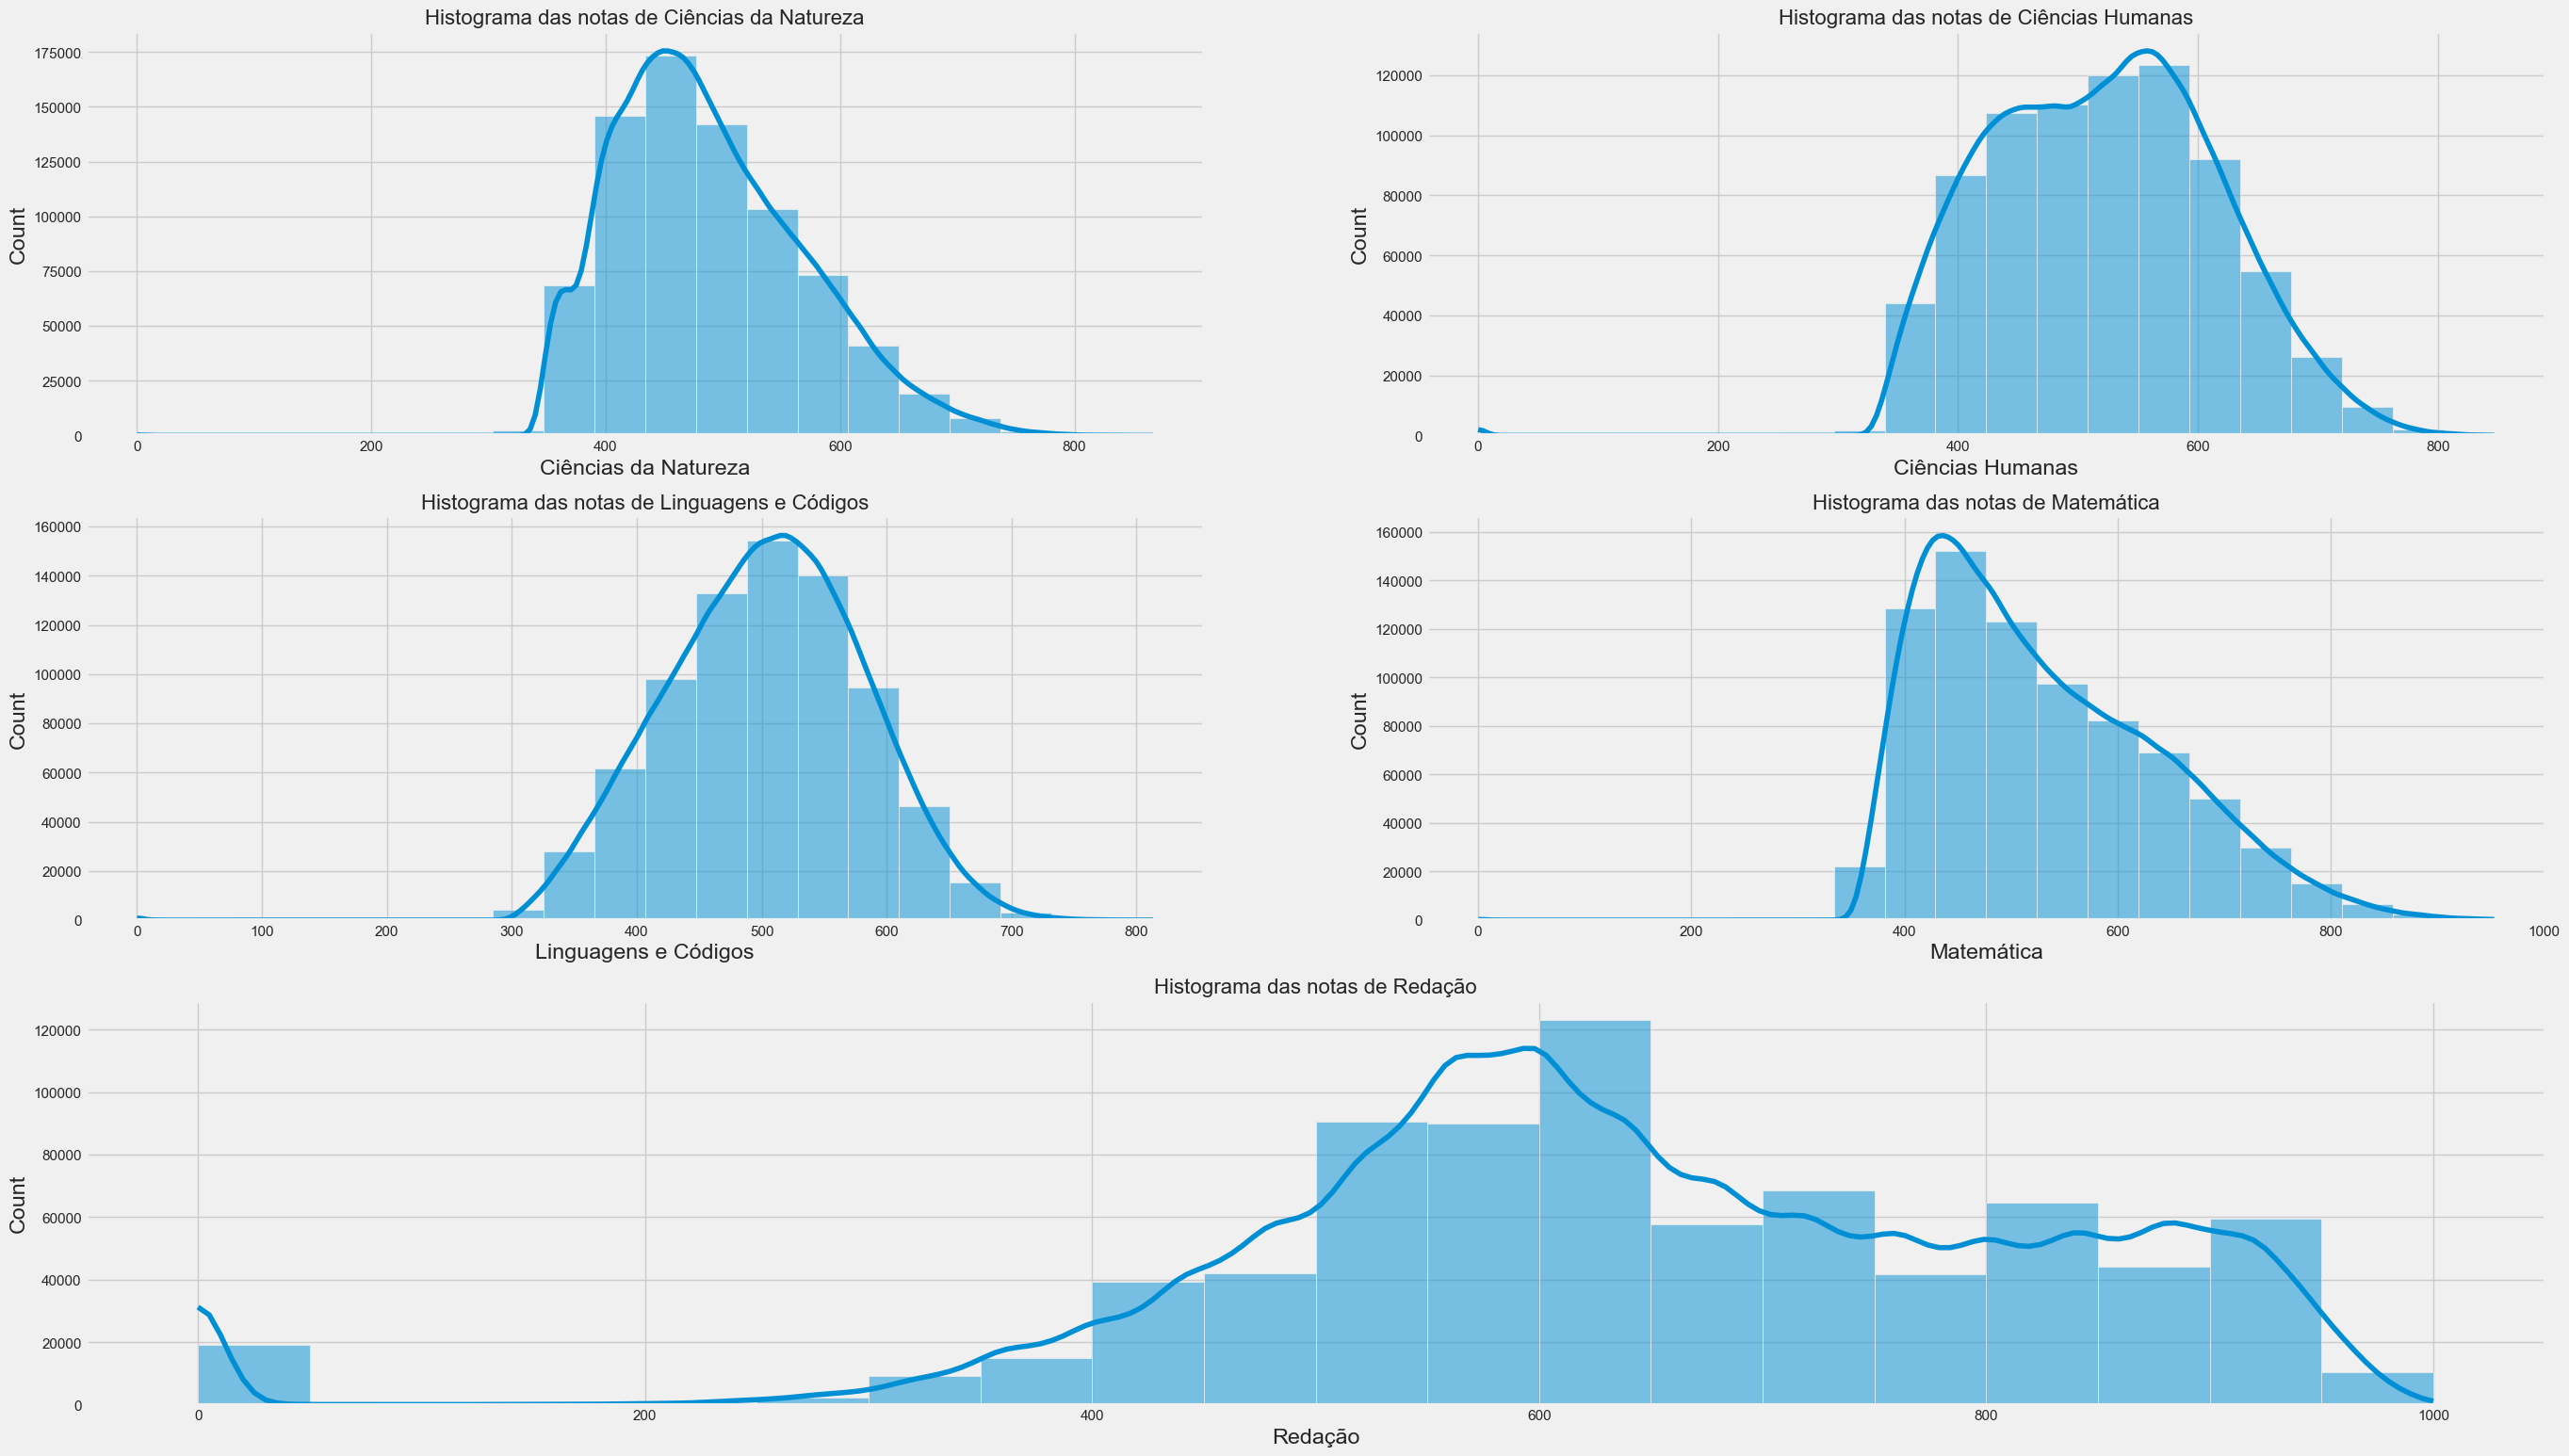

<IPython.core.display.Javascript object>

In [22]:
# Dashboard de histogramas para dimensionar os valores das notas. 
fig = plt.figure(figsize=(30,18)) # definindo o tamanho do dashboard
specs= gridspec.GridSpec(nrows= 3, ncols=2, figure=fig) # criando os parametros de linhas, 
                                                    # colunas e tamanho dos graficos desse dashboard.

ax1 = fig.add_subplot(specs[0, 0]) # Defininado a posição do grafico no grip
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, 0])
ax4 = fig.add_subplot(specs[1, 1])
ax5 = fig.add_subplot(specs[2, :])

# criando o histograma utilizando como eixo x as notas de cada materia, e adicionando features de 
# auxilio na leitura, como 'kde' que cria a linha entre as barras e o 'bins' que defini a quantidade de barras.
sns.histplot(data=data_notas['Ciências da Natureza'], kde=True, bins= 20, ax=ax1).set_title(
    f'Histograma das notas de {data_col[0]}', fontsize=16) 
sns.histplot(data=data_notas['Ciências Humanas'], kde=True, bins= 20, ax=ax2).set_title(
    f'Histograma das notas de {data_col[1]}', fontsize=16)
sns.histplot(data=data_notas['Linguagens e Códigos'], kde=True, bins= 20, ax=ax3).set_title(
    f'Histograma das notas de {data_col[2]}', fontsize=16)
sns.histplot(data=data_notas['Matemática'], kde=True, bins= 20, ax=ax4).set_title(
    f'Histograma das notas de {data_col[3]}', fontsize=16)
sns.histplot(data=data_notas['Redação'], kde=True, bins= 20, ax=ax5).set_title(
    f'Histograma das notas de {data_col[4]}', fontsize=16);

### Medida de dispersão 

In [23]:
mad_notas = (data_notas - data_notas.mean()).abs().mean() # verificando o desvio médio absoluto das notas
mad_notas.round(2) # definindo a utilização de apenas duas casas decimais após a virgula.

Ciências da Natureza     65.26
Ciências Humanas         77.45
Linguagens e Códigos     63.16
Matemática               90.91
Redação                 141.46
dtype: float64

<IPython.core.display.Javascript object>

In [24]:
var_notas = data_notas.var() # verificando o valor da variancia das notas
var_notas.round(2)

Ciências da Natureza     6524.80
Ciências Humanas         8805.83
Linguagens e Códigos     6087.58
Matemática              12065.86
Redação                 34256.27
dtype: float64

<IPython.core.display.Javascript object>

In [25]:
std_notas = data_notas.std() # verificando o valor do desvio padrão das notas
std_notas.round(2)

Ciências da Natureza     80.78
Ciências Humanas         93.84
Linguagens e Códigos     78.02
Matemática              109.84
Redação                 185.08
dtype: float64

<IPython.core.display.Javascript object>

### Distribuição de frequências

In [26]:
# função de distribuição de frenquencias dos dados
def values(data, coluna, dado, tipo, ind):
    print(f'dados unicos da coluna {coluna} = {dado.unique()}') # printa os dados unicos da coluna que for selecionada
    df = pd.DataFrame(dado.value_counts()) # conta os dados da coluna seleciona e ordena do maior ao menor
    df.rename(columns={coluna : tipo}, inplace=True) # renomeando a coluna selecionada pelo valor definido pelo usuario
    percent = pd.DataFrame(dado.value_counts(normalize=True) * 100).round(2) # Calculando o percentual que os dados 
    # da coluna 'valores' representando no dataset 
    df['Em % (percentual)'] = percent # criando a coluna percentual
    
    return df.rename_axis(ind).reset_index() # retornando a função e redefinindo o "index" para facilitar o entendimento

<IPython.core.display.Javascript object>

In [27]:
# distribuição de frequencias da quantidade que cada estado representa no dataset
values(data=data, 
       dado=data['SG_UF_PROVA'],
       coluna = data.columns[11],
       tipo= 'Valores',
       ind = 'Estados')

dados unicos da coluna SG_UF_PROVA = ['AL' 'CE' 'MG' 'BA' 'GO' 'RN' 'PA' 'MT' 'PE' 'MA' 'RO' 'SE' 'PR' 'SP'
 'PB' 'RJ' 'ES' 'RS' 'DF' 'TO' 'PI' 'AM' 'SC' 'AP' 'MS' 'AC' 'RR']


,Estados,Valores,Em % (percentual)
0,SP,103912,13.34
1,CE,73136,9.39
2,MG,69793,8.96
3,BA,63672,8.17
4,RJ,55758,7.16
5,PE,50365,6.47
6,PA,39816,5.11
7,GO,38703,4.97
8,RS,30310,3.89
9,MA,29171,3.74


<IPython.core.display.Javascript object>

In [28]:
# distribuição de frequencias dos sexos que realizaram a prova
values(data = data, 
       dado = data['TP_SEXO'],
       coluna = data.columns[3],
       tipo = 'Valores',
       ind = 'Sexos')

dados unicos da coluna TP_SEXO = ['M' 'F']


,Sexos,Valores,Em % (percentual)
0,F,528262,67.82
1,M,250706,32.18


<IPython.core.display.Javascript object>

In [29]:
# distribuição de frequencias da quantidade de não treineiros [0] e treineiros [1] no dataset
values(data = data, 
       dado = data['IN_TREINEIRO'],
       coluna = data.columns[10],
       tipo = 'Valores',
       ind = 'Treineiro')

dados unicos da coluna IN_TREINEIRO = [0 1]


,Treineiro,Valores,Em % (percentual)
0,0,680598,87.37
1,1,98370,12.63


<IPython.core.display.Javascript object>

In [30]:
# visualização dos dados unicos da tabela faixa etaria
values_custom = values(data=data,
       dado = data['TP_FAIXA_ETARIA'],
       coluna= data.columns[2],
       tipo = 'Valores',
       ind='Faixas Etárias')

dados unicos da coluna TP_FAIXA_ETARIA = [12  3  2  8  4  5 11  7 13  1 10  9  6 14 16 15 17 18 19 20]


<IPython.core.display.Javascript object>

In [31]:
# Criando no DF a coluna idade que tem informação atribuida com base no valor da coluna "faixa etaria"  
values_custom['idade'] = values_custom['Faixas Etárias'].apply(
# utilizando o método 'apply' para executar a função de atribuir o valor das linhas da coluna 'idade' com base no valor 
# da coluna 'faixa etaria'
    lambda x: 'Abaixo de 17 anos' if x == 1 else 
              '17 anos' if x == 2 else
              '18 anos' if x == 3 else
              '19 anos' if x == 4 else
              '20 anos' if x == 5 else
              '21 anos' if x == 6 else
              '22 anos' if x == 7 else
              '23 anos' if x == 8 else
              '24 anos' if x == 9 else
              '25 anos' if x == 10 else
              'Entre 26 e 30 anos' if x == 11 else
              'Entre 31 e 35 anos' if x == 12 else
              'Entre 36 e 40 anos' if x == 13 else
              'Entre 41 e 45 anos' if x == 14 else
              'Entre 46 e 50 anos' if x == 15 else
              'Entre 51 e 55 anos' if x == 16 else
              'Entre 56 e 60 anos' if x == 17 else
              'Entre 61 e 65 anos' if x == 18 else
              'Entre 66 e 70 anos' if x == 19 else 'Acima de 70 anos')
 
values_custom # Dados ordenados dos valores mais elevados aos mais reduzidos. 

,Faixas Etárias,Valores,Em % (percentual),idade
0,3,215931,27.72,18 anos
1,2,200765,25.77,17 anos
2,4,98886,12.69,19 anos
3,1,60146,7.72,Abaixo de 17 anos
4,5,54298,6.97,20 anos
5,6,32376,4.16,21 anos
6,11,24951,3.20,Entre 26 e 30 anos
7,7,21384,2.75,22 anos
8,8,14567,1.87,23 anos
9,12,12861,1.65,Entre 31 e 35 anos


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribuição das notas de Ciências da Natureza')

Text(0.5, 1.0, 'Distribuição das notas de Ciências Humanas')

Text(0.5, 1.0, 'Distribuição das notas de Linguagens e Códigos')

Text(0.5, 1.0, 'Distribuição das notas de Matemática')

Text(0.5, 1.0, 'Distribuição das notas de Redação')

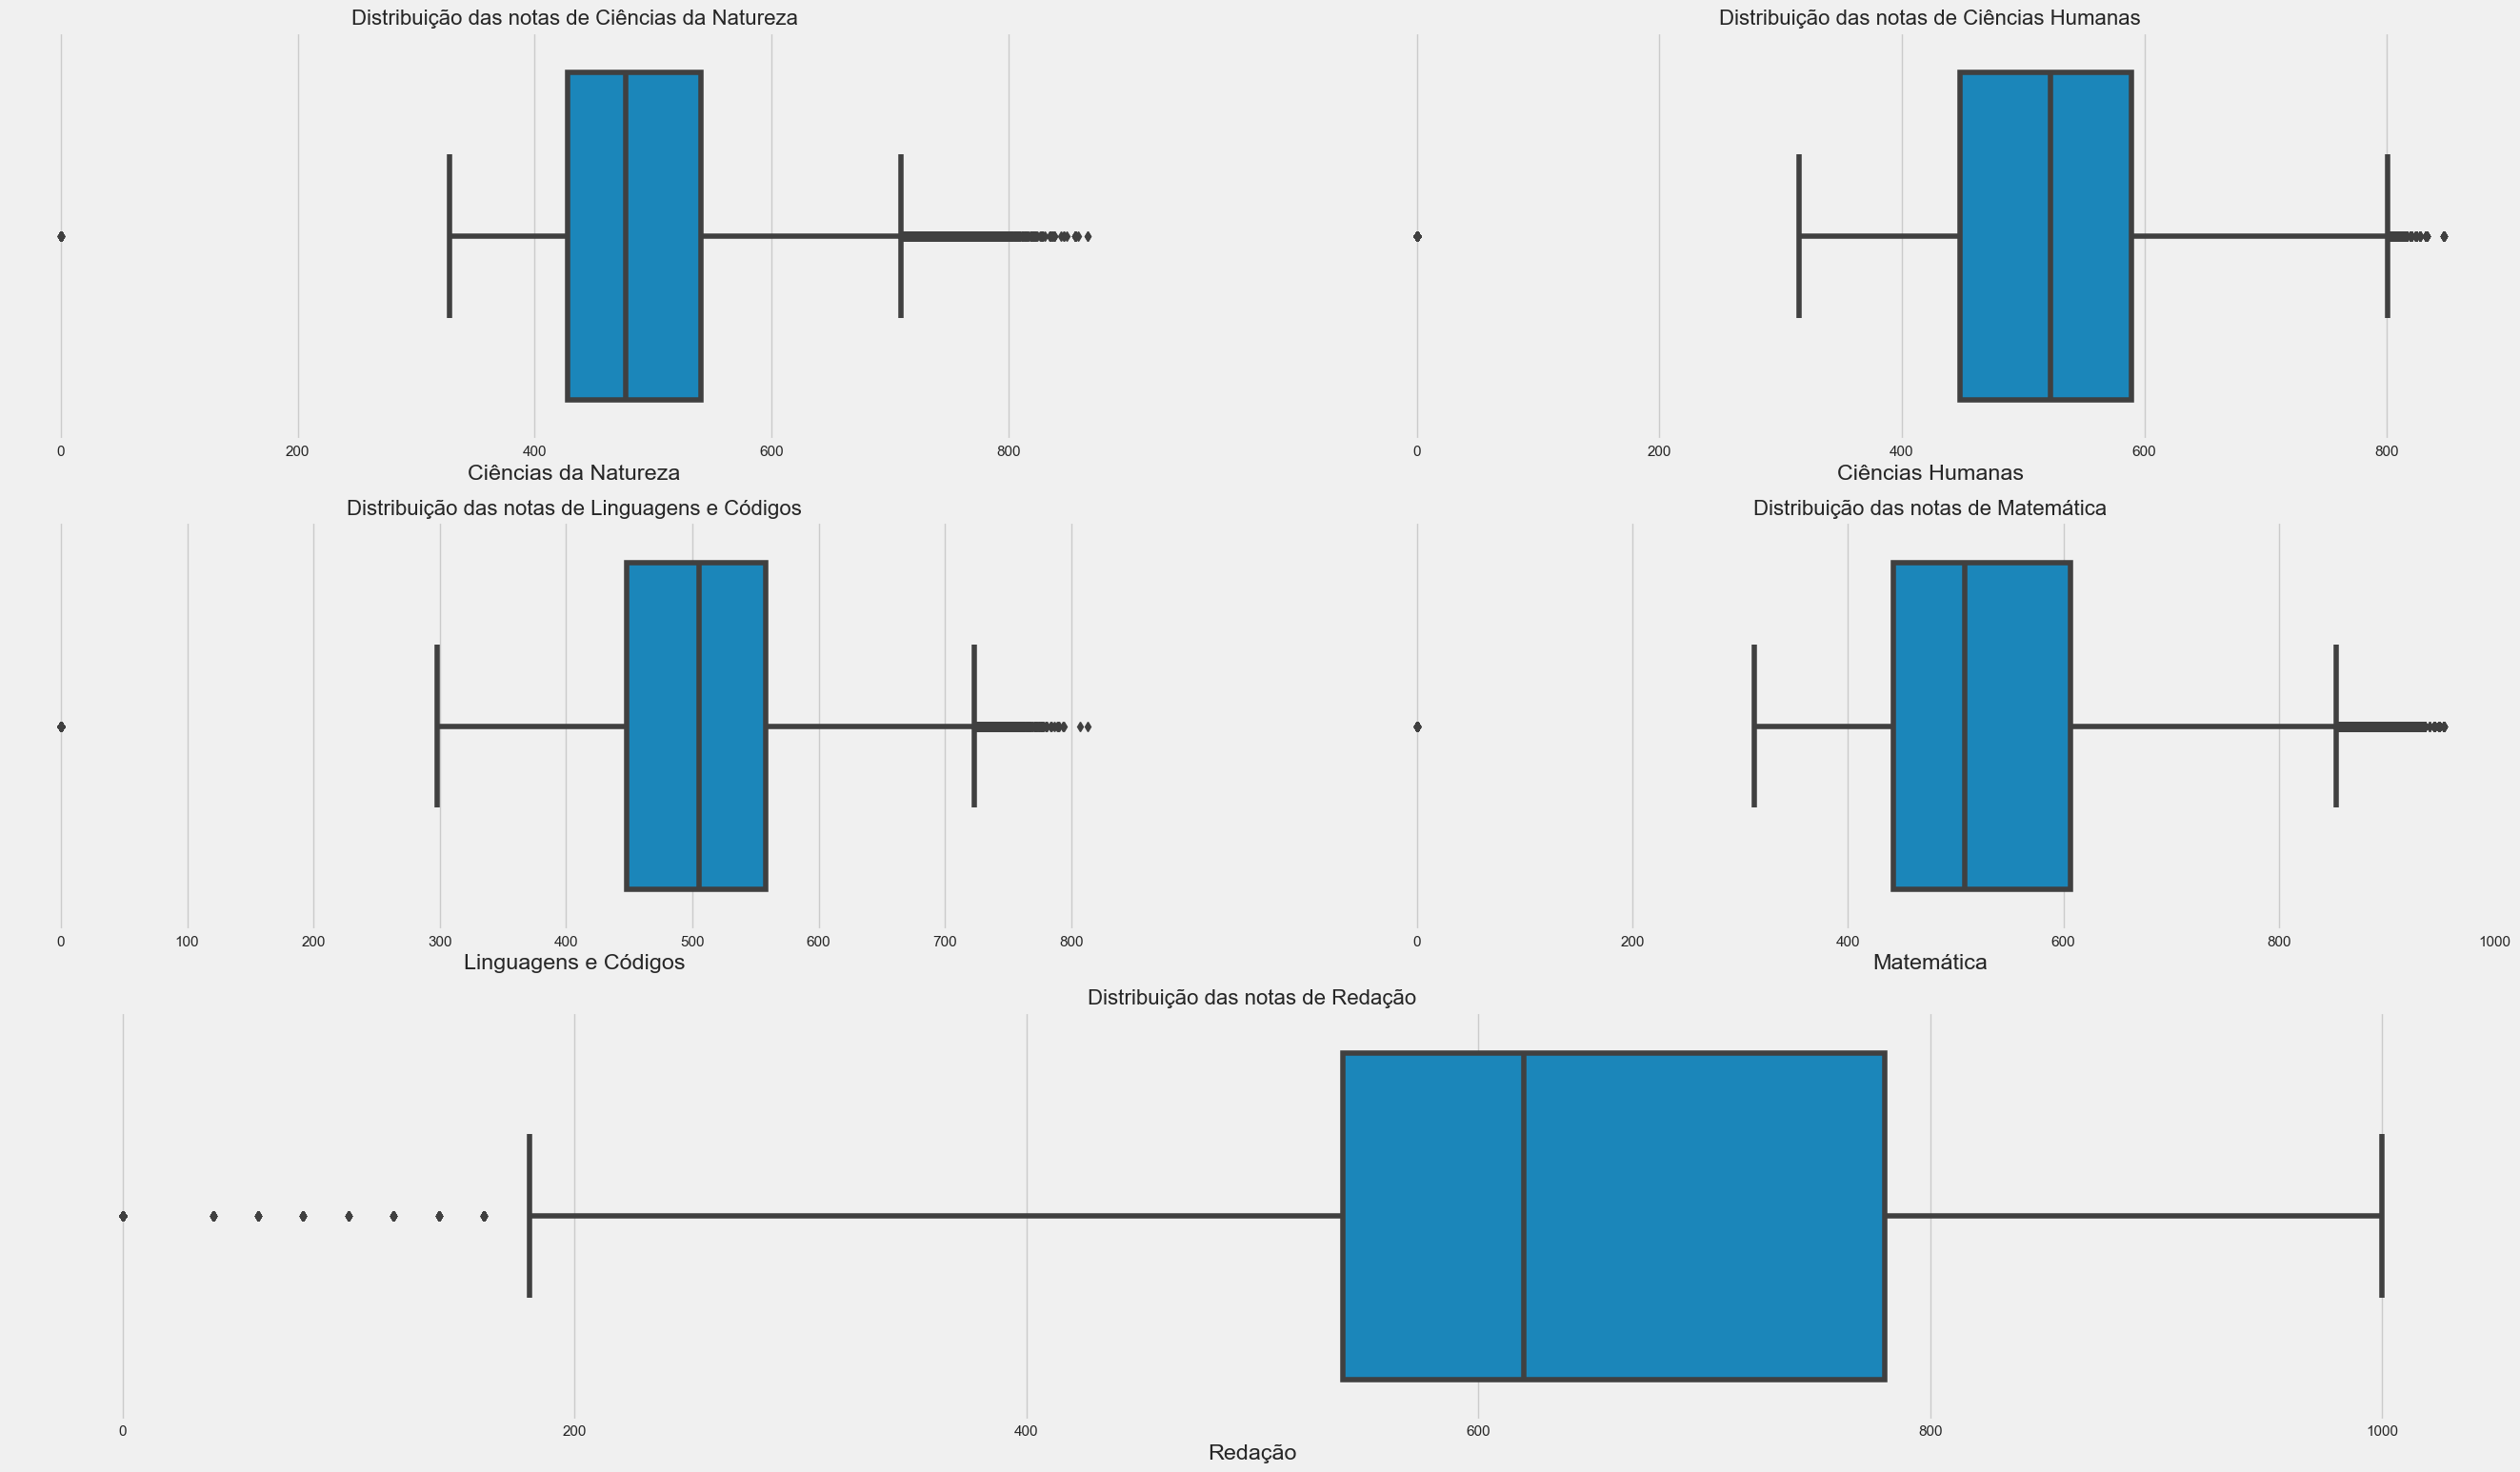

<IPython.core.display.Javascript object>

In [32]:
# Plotando um boxplot da distribuição das notas das materias
fig = plt.figure(figsize=(30,18))
specs = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, 0])
ax4 = fig.add_subplot(specs[1, 1])
ax5 = fig.add_subplot(specs[2, :])

sns.boxplot(x = data_notas['Ciências da Natureza'], data=data_notas['Ciências da Natureza'], 
            orient='h', ax=ax1).set_title(f'Distribuição das notas de {data_col[0]}', fontsize=16)
sns.boxplot(x = data_notas['Ciências Humanas'], data=data_notas['Ciências Humanas'], 
            orient='h', ax=ax2).set_title(f'Distribuição das notas de {data_col[1]}', fontsize=16)
sns.boxplot(x = data_notas['Linguagens e Códigos'], data=data_notas['Linguagens e Códigos'], 
            orient='h', ax=ax3).set_title(f'Distribuição das notas de {data_col[2]}', fontsize=16)
sns.boxplot(x = data_notas['Matemática'], data=data_notas['Matemática'], 
            orient='h', ax=ax4).set_title(f'Distribuição das notas de {data_col[3]}', fontsize=16)
sns.boxplot(x = data_notas['Redação'], data=data_notas['Redação'], 
            orient='h',ax=ax5).set_title(f'Distribuição das notas de {data_col[4]}', fontsize=16)

## HIPOTESES

### H1

#### Existe uma diferença significativa entre as notas de homens e mulheres

### H2 

#### Os estados da região Sul tem notas melhores ao restante do país

### H3

#### Os alunos que mais faltam à prova, são os de renda familiar menor

### H4

#### A média de notas está ligada a faixa de renda que o aluno se encontra

### H5

#### Alunos de escola privada possuem melhor performance na prova

## RESOLUÇÃO

### 1. CALCULAR PERCENTUAL MÉDIO DE PONTOS NAS MATÉRIAS DAS PROVAS;

In [33]:
# Filtrando as colunas desejadas
data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,505.9,551.8,498.3,461.5,560.0
3,580.7,678.9,638.9,659.5,780.0
4,497.7,532.4,457.6,582.6,780.0
8,487.4,476.5,450.7,493.4,520.0
9,507.6,539.2,494.6,413.3,380.0


<IPython.core.display.Javascript object>

In [34]:
# Calculando a média de cada uma das colunas e transformando o resultado como um dataframe filtrado
data_notes = data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean()

# Criando o novo dataframe
data_notas_mean = pd.DataFrame(data_notes)

# Criando a coluna notas
data_notas_mean.columns = ['notas'] 

# Renomeando os index com o 'set_axis'
data_notas_mean = data_notas_mean.set_axis(['Ciências da natureza','Ciências Humanas','Linguagens e Códigos',
                                            'Matematica','Redação'], copy=True)
data_notas_mean

,notas
Ciências da natureza,488.322539
Ciências Humanas,521.559648
Linguagens e Códigos,502.894612
Matematica,531.036687
Redação,638.130218


<IPython.core.display.Javascript object>

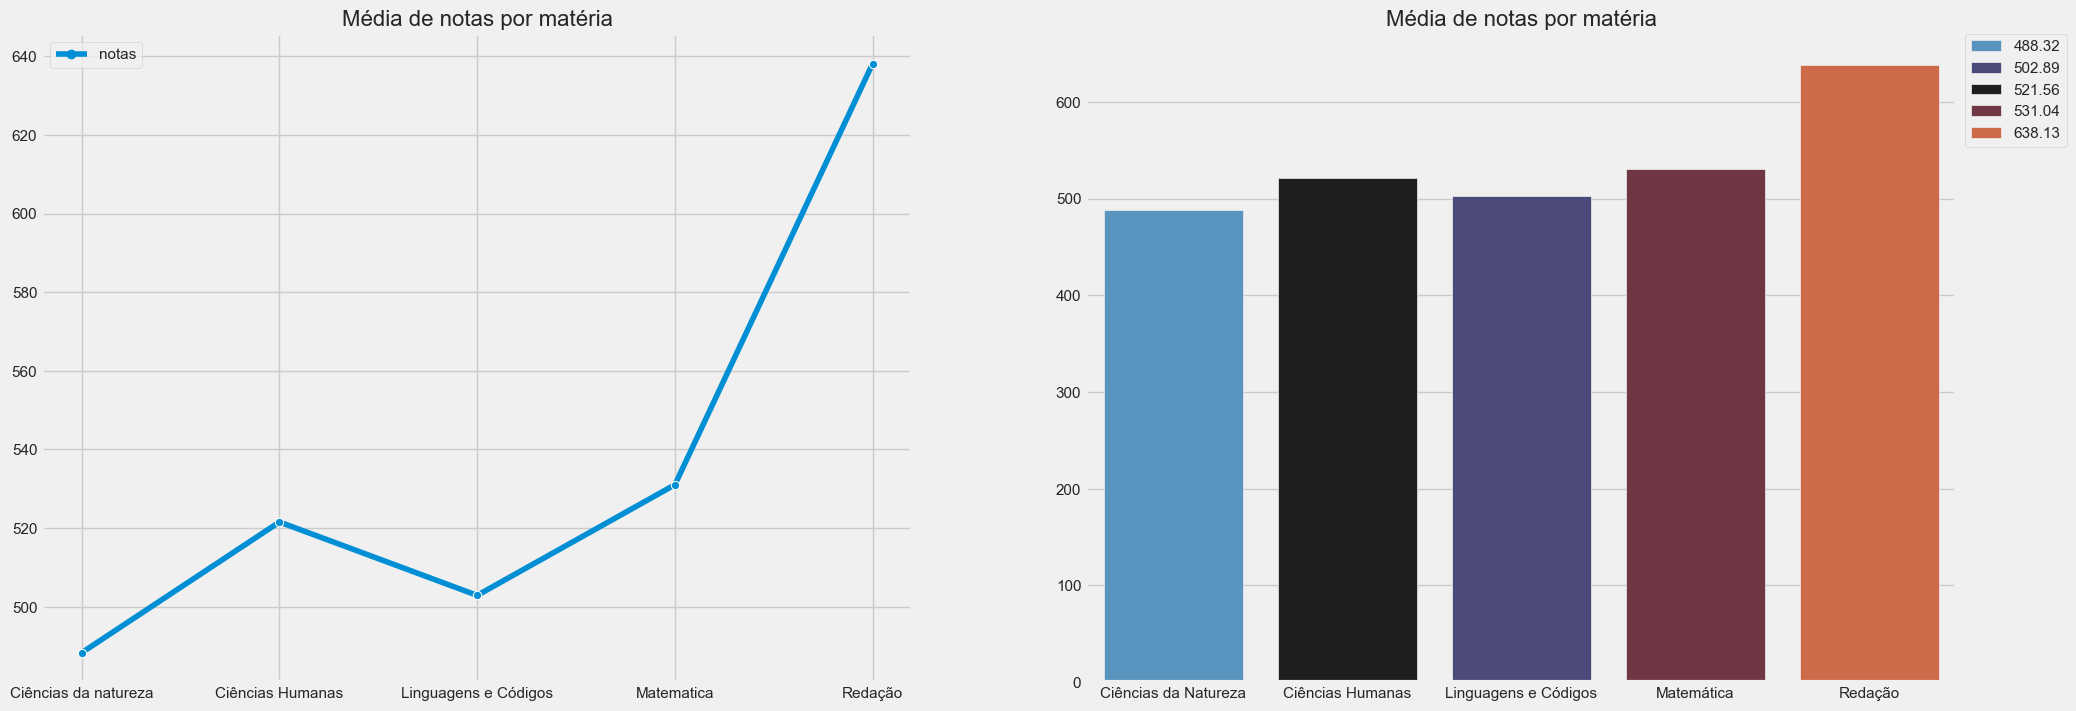

<IPython.core.display.Javascript object>

In [35]:
# função de plotar graficos para melhor visualização dos dados
def media_notas(data):
    fig = plt.figure(figsize=(22,8))
    specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    
    ax1 = fig.add_subplot(specs[0, 0])
    ax2 = fig.add_subplot(specs[0, 1])
    
    sns.lineplot(data_notas_mean, markers = True,  ax=ax1).set_title('Média de notas por matéria', fontsize=16);
    
    sns.barplot(y= data_notes, x=data_col, palette="icefire", ax=ax2, hue=data_notes.round(2), dodge=False).set_title(
        'Média de notas por matéria', fontsize=16)
    plt.legend(bbox_to_anchor=(1.001, 1.012))
    
media_notas(data)

In [36]:
# plotando a média geral das notas
data_notas_mean
print(f'A média de notas geral é de {data_notas_mean.mean()[0]:.2f} pontos')

,notas
Ciências da natureza,488.322539
Ciências Humanas,521.559648
Linguagens e Códigos,502.894612
Matematica,531.036687
Redação,638.130218


A média de notas geral é de 536.39 pontos


<IPython.core.display.Javascript object>

### 2. CALCULAR MÉDIA DE NOTAS POR SEXO

In [37]:
# Retirando apenas as colunas para utilizar no dashboard
data_column = data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

# Renomeando as colunas do df
data_column = data_column.rename(columns={'NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_CH': 'Ciências Humanas', 
                                          'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matematica', 
                                          'NU_NOTA_REDACAO':'Redação'}, copy=True)

# Criando a variavel final
data_columns = data_column.columns
data_columns

Index(['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matematica', 'Redação'],
      dtype='object')

<IPython.core.display.Javascript object>

In [38]:
# Localizando dados filtrados pela coluna 'SEXO'
# filtrando dados do sexo masculino
data_masc = data.loc[data['TP_SEXO'] == 'M' ] 

# filtrando dados do sexo feminino
data_fem = data.loc[data['TP_SEXO'] == 'F' ]

# calculando a média de pontos do sexo feminino em todas as matérias
# criando a variavel 'data_fem' com base na medias das notas do sexo feminino
data_fem = data_fem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()

# Gerando um DF dos dados
data_fem_mean = pd.DataFrame(data_fem)

# Criando a coluna notas
data_fem_mean.columns = ['notas']

# definindo arredondamento de 2 casas decimais para o df
data_fem_mean.round(2)

,notas
NU_NOTA_CN,481.08
NU_NOTA_CH,515.98
NU_NOTA_LC,500.50
NU_NOTA_MT,519.07
NU_NOTA_REDACAO,646.42


<IPython.core.display.Javascript object>

In [39]:
# calculando a média de pontos do sexo masculino em todas as matérias
# criando a variavel 'data_fem' com base na medias das notas do sexo feminino
data_masc = data_masc[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()

# Gerando um DF dos dados
data_masc_mean = pd.DataFrame(data_masc) 

# Criando a coluna notas
data_masc_mean.columns = ['notas']

# definindo arredondamento de 2 casas decimais para o df
data_masc_mean.round(2)

,notas
NU_NOTA_CN,503.58
NU_NOTA_CH,533.33
NU_NOTA_LC,507.94
NU_NOTA_MT,556.25
NU_NOTA_REDACAO,620.67


<IPython.core.display.Javascript object>

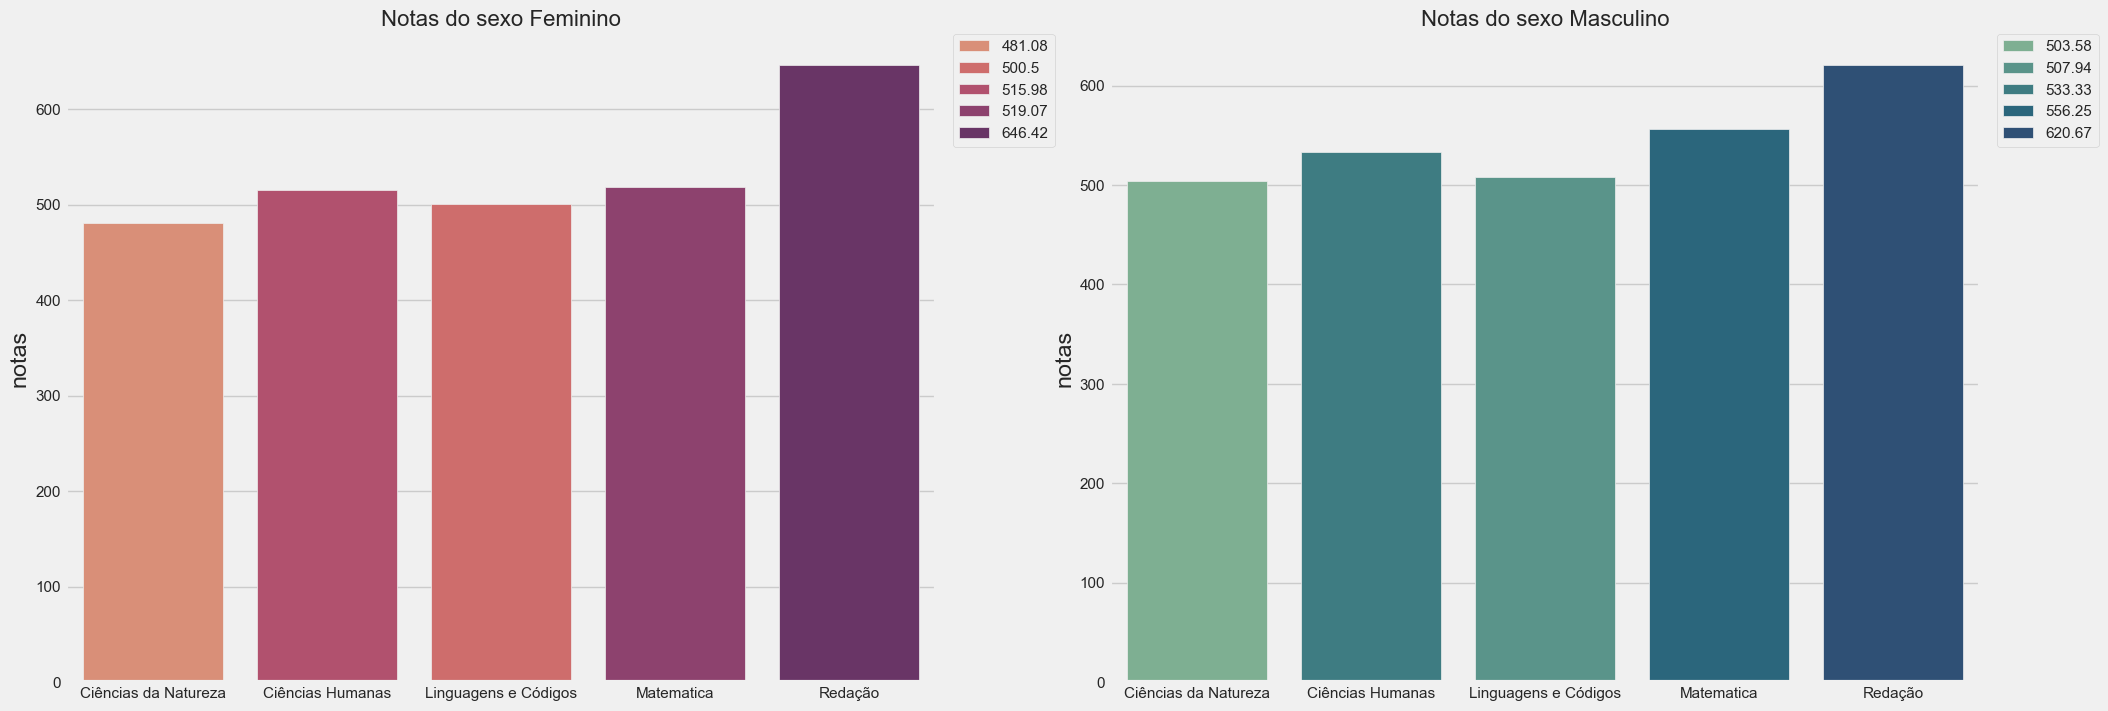

<IPython.core.display.Javascript object>

In [40]:
# Plotando dashboard para comparação das notas entre masc e fem
fig = plt.figure(figsize=(22,8))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

sns.barplot(y = data_fem_mean['notas'], x=data_columns, ax=ax1, palette='flare',
            hue=data_fem.round(2) , dodge=False).set_title('Notas do sexo Feminino', fontsize=16);
sns.move_legend(ax1, loc='upper right', bbox_to_anchor=(1.145, 1.012));

sns.barplot(y= data_masc_mean['notas'], x=data_columns, ax=ax2, palette="crest", 
            hue=data_masc.round(2), dodge=False).set_title('Notas do sexo Masculino', fontsize=16);
plt.legend(bbox_to_anchor=(1.145, 1.012));

### 3. CONFRONTAR NOTAS ENTRE MASCULINO X FEMININO

In [41]:
# Juntando os df's de masculino e feminino e gerando o dataframe do resultado
data_conjuntos = data_fem_mean.merge(data_masc_mean, right_index= True, left_index=True)

# Renomeando colunas
data_conjuntos.columns = ['F','M']

# Criar a coluna 'Diferenças em % (default 100%)' com base no calculo de '(data_fem_mean / data_masc_mean) * 100)'
data_conjuntos['Diferenças em % (default 100%)'] = (((data_fem_mean / data_masc_mean) * 100)).round(2)

# Juntando em um DF
data_conjunto = pd.DataFrame(data_conjuntos)
data_conjunto

,F,M,Diferenças em % (default 100%)
NU_NOTA_CN,481.082679,503.577628,95.53
NU_NOTA_CH,515.975705,533.325561,96.75
NU_NOTA_LC,500.500463,507.939316,98.54
NU_NOTA_MT,519.072629,556.246126,93.32
NU_NOTA_REDACAO,646.418444,620.666119,104.15


<IPython.core.display.Javascript object>

In [42]:
# Calculando a diferença média entre homens e mulheres
data_dif_MxF = (data_conjuntos['M'] / data_conjuntos['F'] * 100) - 100
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif_MxF.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 2.54%


<IPython.core.display.Javascript object>

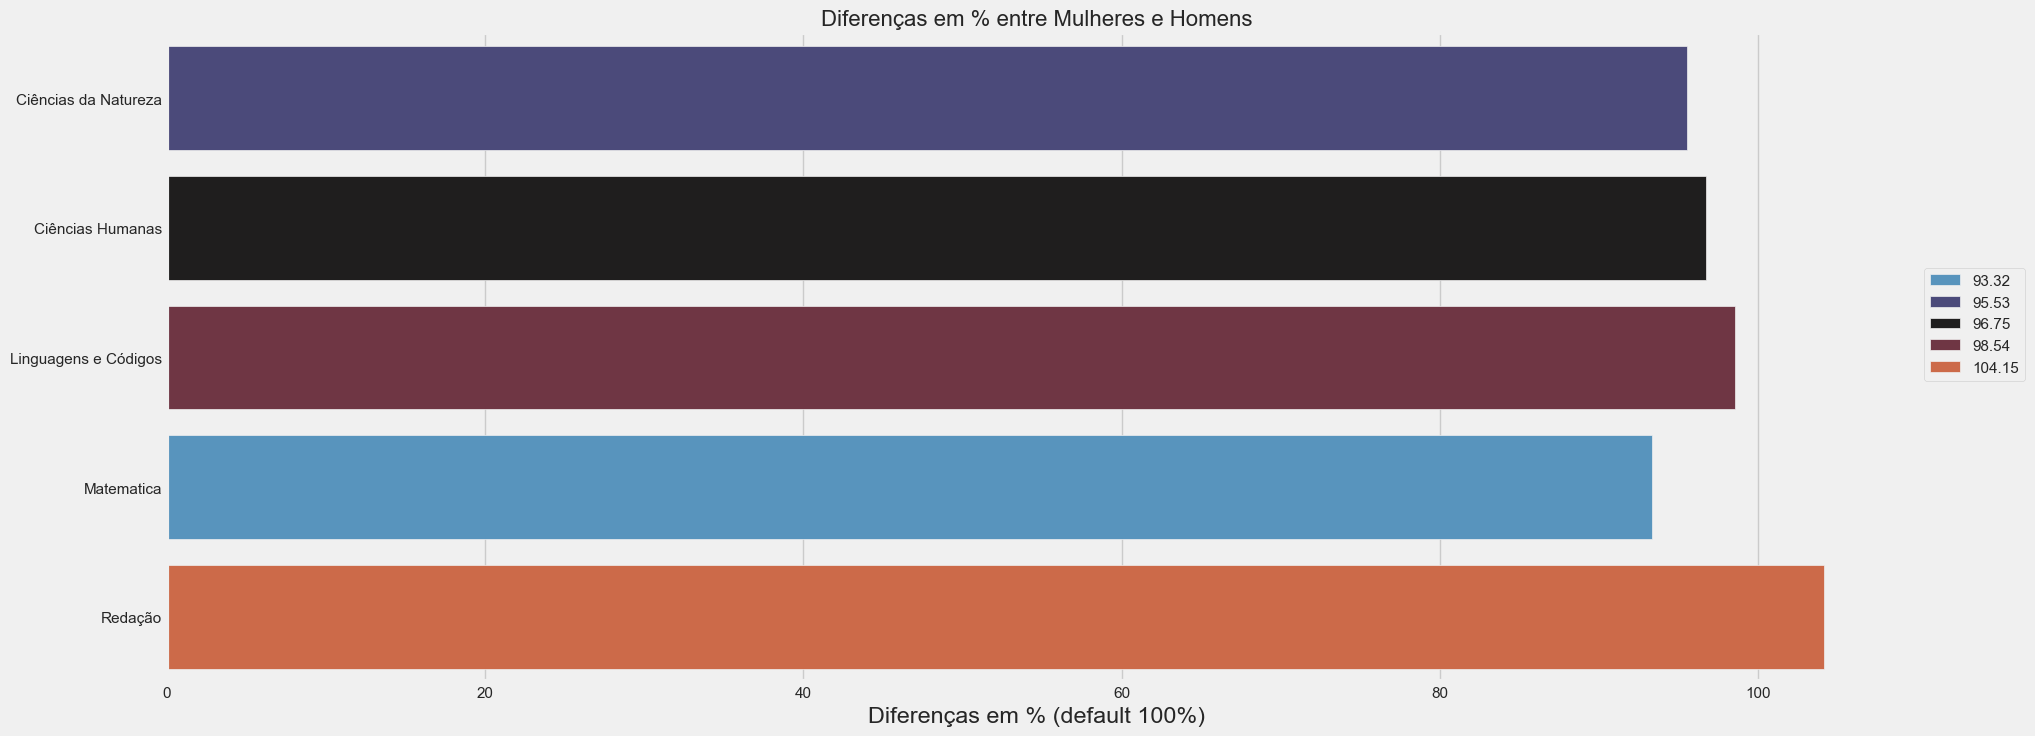

<IPython.core.display.Javascript object>

In [43]:
# Plotando o grafico das notas por sexo
plt.figure(figsize=(20,8))
sns.barplot(x=data_conjunto['Diferenças em % (default 100%)'], y=data_columns, palette="icefire", 
            hue=data_conjunto['Diferenças em % (default 100%)'].round(2), 
            dodge=False).set_title('Diferenças em % entre Mulheres e Homens', fontsize=16)
plt.legend(bbox_to_anchor=(1.0725, 0.65));

### 4. CALCULAR MÉDIA DE NOTAS POR ESTADOS/REGIÃO

In [44]:
# Criar a variavel 'data_uf' com os dados de uf da prova do dataset
data_uf = data[['SG_UF_PROVA']]

# Renomeando a coluna para 'uf'
data_uf= data_uf.rename(columns={'SG_UF_PROVA' : 'UF'}, copy=True)

# Criando a variavel 'data_notas_uf' com a junção do 'data_notas' e 'data_uf'
data_notas_uf = data_notas.merge(data_uf, left_index=True, right_index=True)

# Criando a variavel 'data_uf_notas_grup' com o agrupámento por uf da varivael 'data_notas_uf' 
data_uf_notas_group = data_notas_uf.groupby('UF').mean()

# Resetendo os index da variavel
data_uf_notas = data_uf_notas_group.reset_index()

# Ordenando os dados do df por uf em ordem alfabetica
data_uf_notas.sort_index(ascending=True).head()

,UF,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
0,AC,470.058541,503.698251,486.787161,498.092749,609.319684
1,AL,474.556547,505.022599,486.660143,515.544432,637.323025
2,AM,459.863753,488.680507,475.973054,487.385657,570.037138
3,AP,465.430529,499.171251,475.970714,491.329505,605.047549
4,BA,477.330406,508.889169,490.161620,511.634481,630.019475


<IPython.core.display.Javascript object>

In [45]:
# Criando as variaveis com as regioes do pais utilizando os estados de valores para essas variaveis
Norte = ['AM','RR','AP','AC','RO','PA','TO']
Sul = ['RS','SC','PR']
Sudeste=['SP','MG','ES','RJ']
Centro_Oeste = ['MT','GO','DF','MS']
Nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']

<IPython.core.display.Javascript object>

In [46]:
# Nova coluna 'média' agrupada pela média das notas por uf
data_uf_notas['Médias'] = data_uf_notas.UF.apply(
    lambda x: (data_uf_notas.loc[data_uf_notas['UF'] == x].mean().sum() / 5).round(2))

# Nova variavel 'regiao' definida pela função que defini a regiao do pais com base no estado do index.
data_uf_notas['Região'] = data_uf_notas.UF.apply(
    lambda x: 'Norte' if x in Norte else 
              'Sul' if x in Sul else
              'Sudeste' if x in Sudeste else
              'Nordeste' if x in Nordeste else
              'Centro Oeste' if x in Centro_Oeste else 'NA')
   
# Ordenando os dados descendentemente pela coluna 'média'
data_uf_notas.sort_values('Médias', ascending=False).round(2)

,UF,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Médias,Região
10,MG,512.28,548.68,525.59,567.12,685.60,567.86,Sudeste
25,SP,510.92,550.37,531.99,565.58,658.65,563.50,Sudeste
23,SC,510.50,546.15,521.29,559.56,655.45,558.59,Sul
22,RS,504.41,544.35,523.54,552.02,658.75,556.61,Sul
6,DF,505.70,542.59,523.52,549.03,646.86,553.54,Centro Oeste
18,RJ,499.31,539.02,519.44,546.51,661.21,553.10,Sudeste
7,ES,504.59,535.92,514.51,550.45,659.05,552.90,Sudeste
17,PR,501.23,537.10,517.02,545.88,632.17,546.68,Sul
19,RN,490.73,521.43,499.98,529.50,650.14,538.36,Nordeste
12,MT,484.51,515.97,494.22,524.14,627.42,529.25,Centro Oeste


<IPython.core.display.Javascript object>

,UF,Médias
10,MG,567.86
25,SP,563.50
23,SC,558.59
22,RS,556.61
6,DF,553.54
18,RJ,553.10
7,ES,552.90
17,PR,546.68
19,RN,538.36
12,MT,529.25


<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Média geral de notas de por Estado')

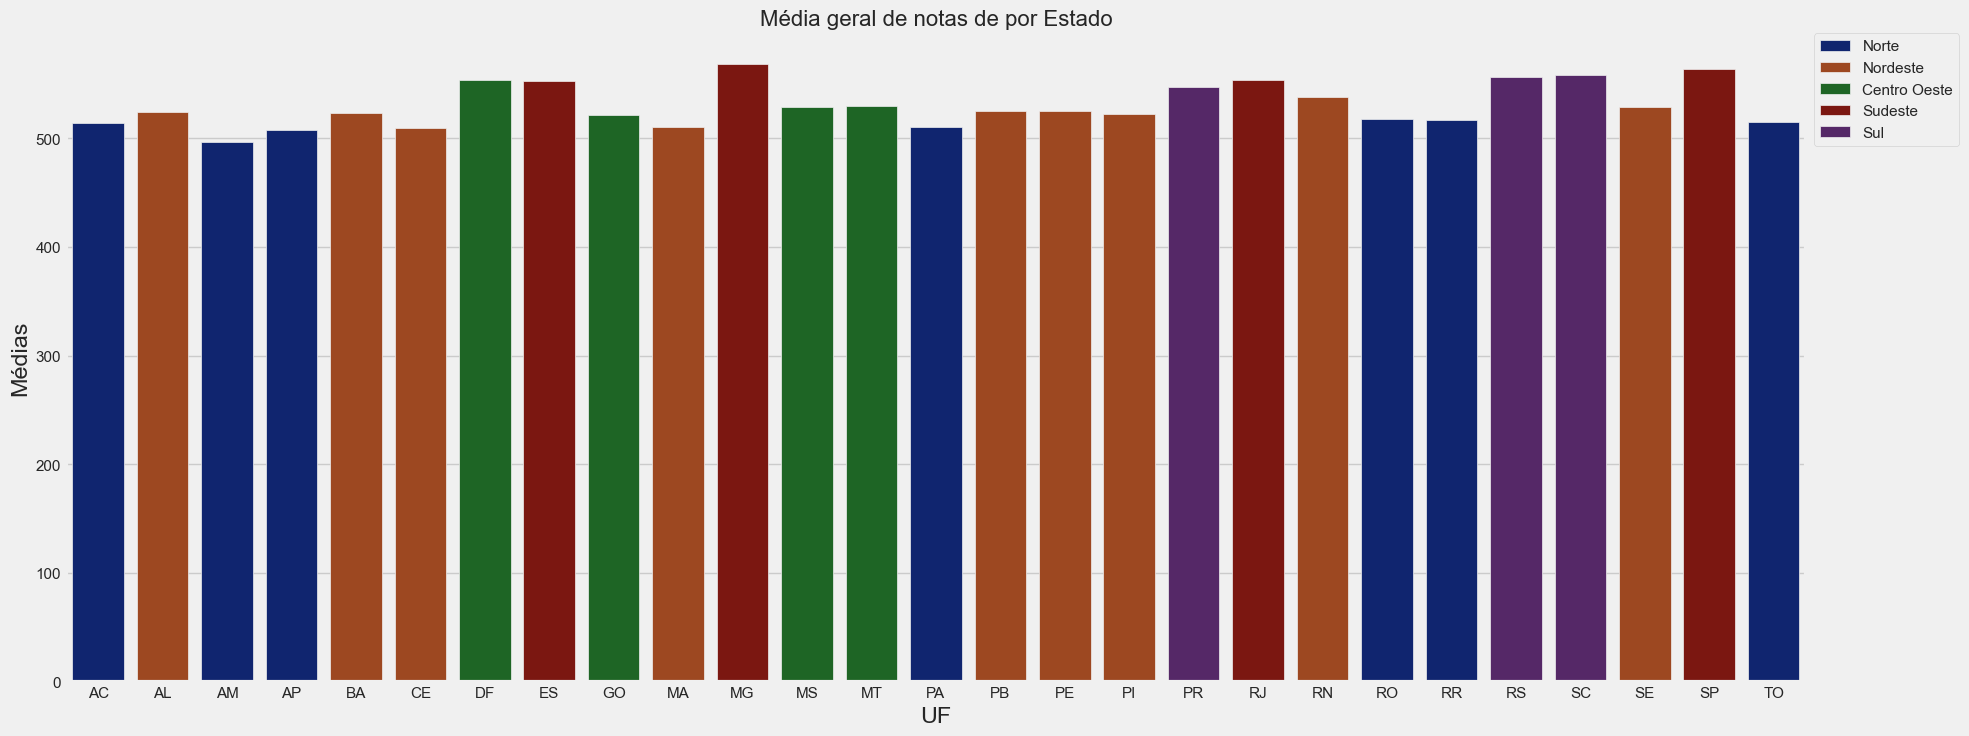

<IPython.core.display.Javascript object>

In [47]:
# Retirando as colunas 'UF' e 'médias' e ordendo de maneira descendente pela média 
data_uf_notas[['UF','Médias']].sort_values('Médias', ascending=False)

# Plotando o grafico das notas por uf
plt.figure(figsize=(20,8))
sns.barplot(y = data_uf_notas['Médias'], x = data_uf_notas.UF.sort_values(ascending=True), palette='dark', 
            hue=data_uf_notas['Região'], dodge=False).set_title('Média geral de notas de por Estado', fontsize=16);
plt.legend(bbox_to_anchor=(1, 1.012))

,Região,Médias
0,Sudeste,559.34
1,Sul,553.96
2,Centro Oeste,533.35
3,Nordeste,523.03
4,Norte,511.11


<AxesSubplot: xlabel='Região', ylabel='Médias'>

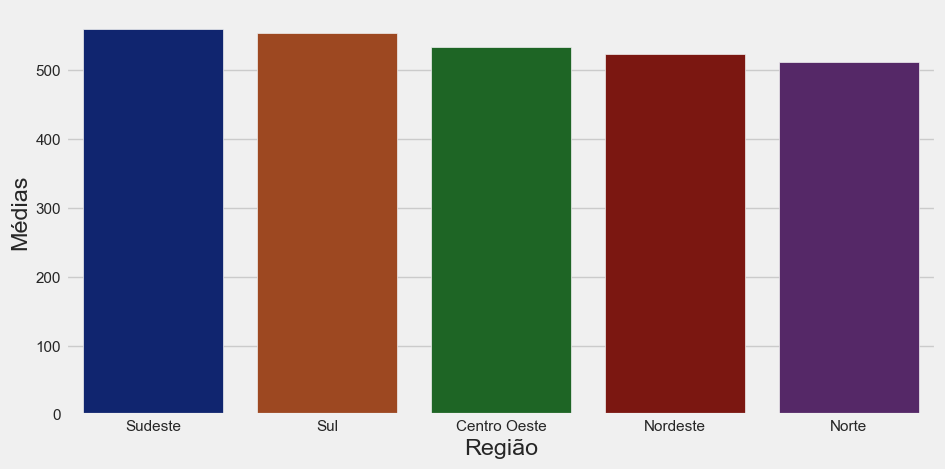

<IPython.core.display.Javascript object>

In [48]:
# Criando a variavel 'data_medias' com o agrupamento das médias por regiao e ordenando decrescentemente os valores
data_medias = data_uf_notas[['Médias',
                             'Região']].groupby('Região').mean().sort_values('Médias', 
                                                                             ascending=False).reset_index()
data_medias

# plotando um barplot das médias por região
sns.barplot(y=data_medias['Médias'], x=data_medias['Região'], palette='dark')

### 5. COMPARAR NOTAS POR UF; 

<Figure size 3000x1800 with 0 Axes>

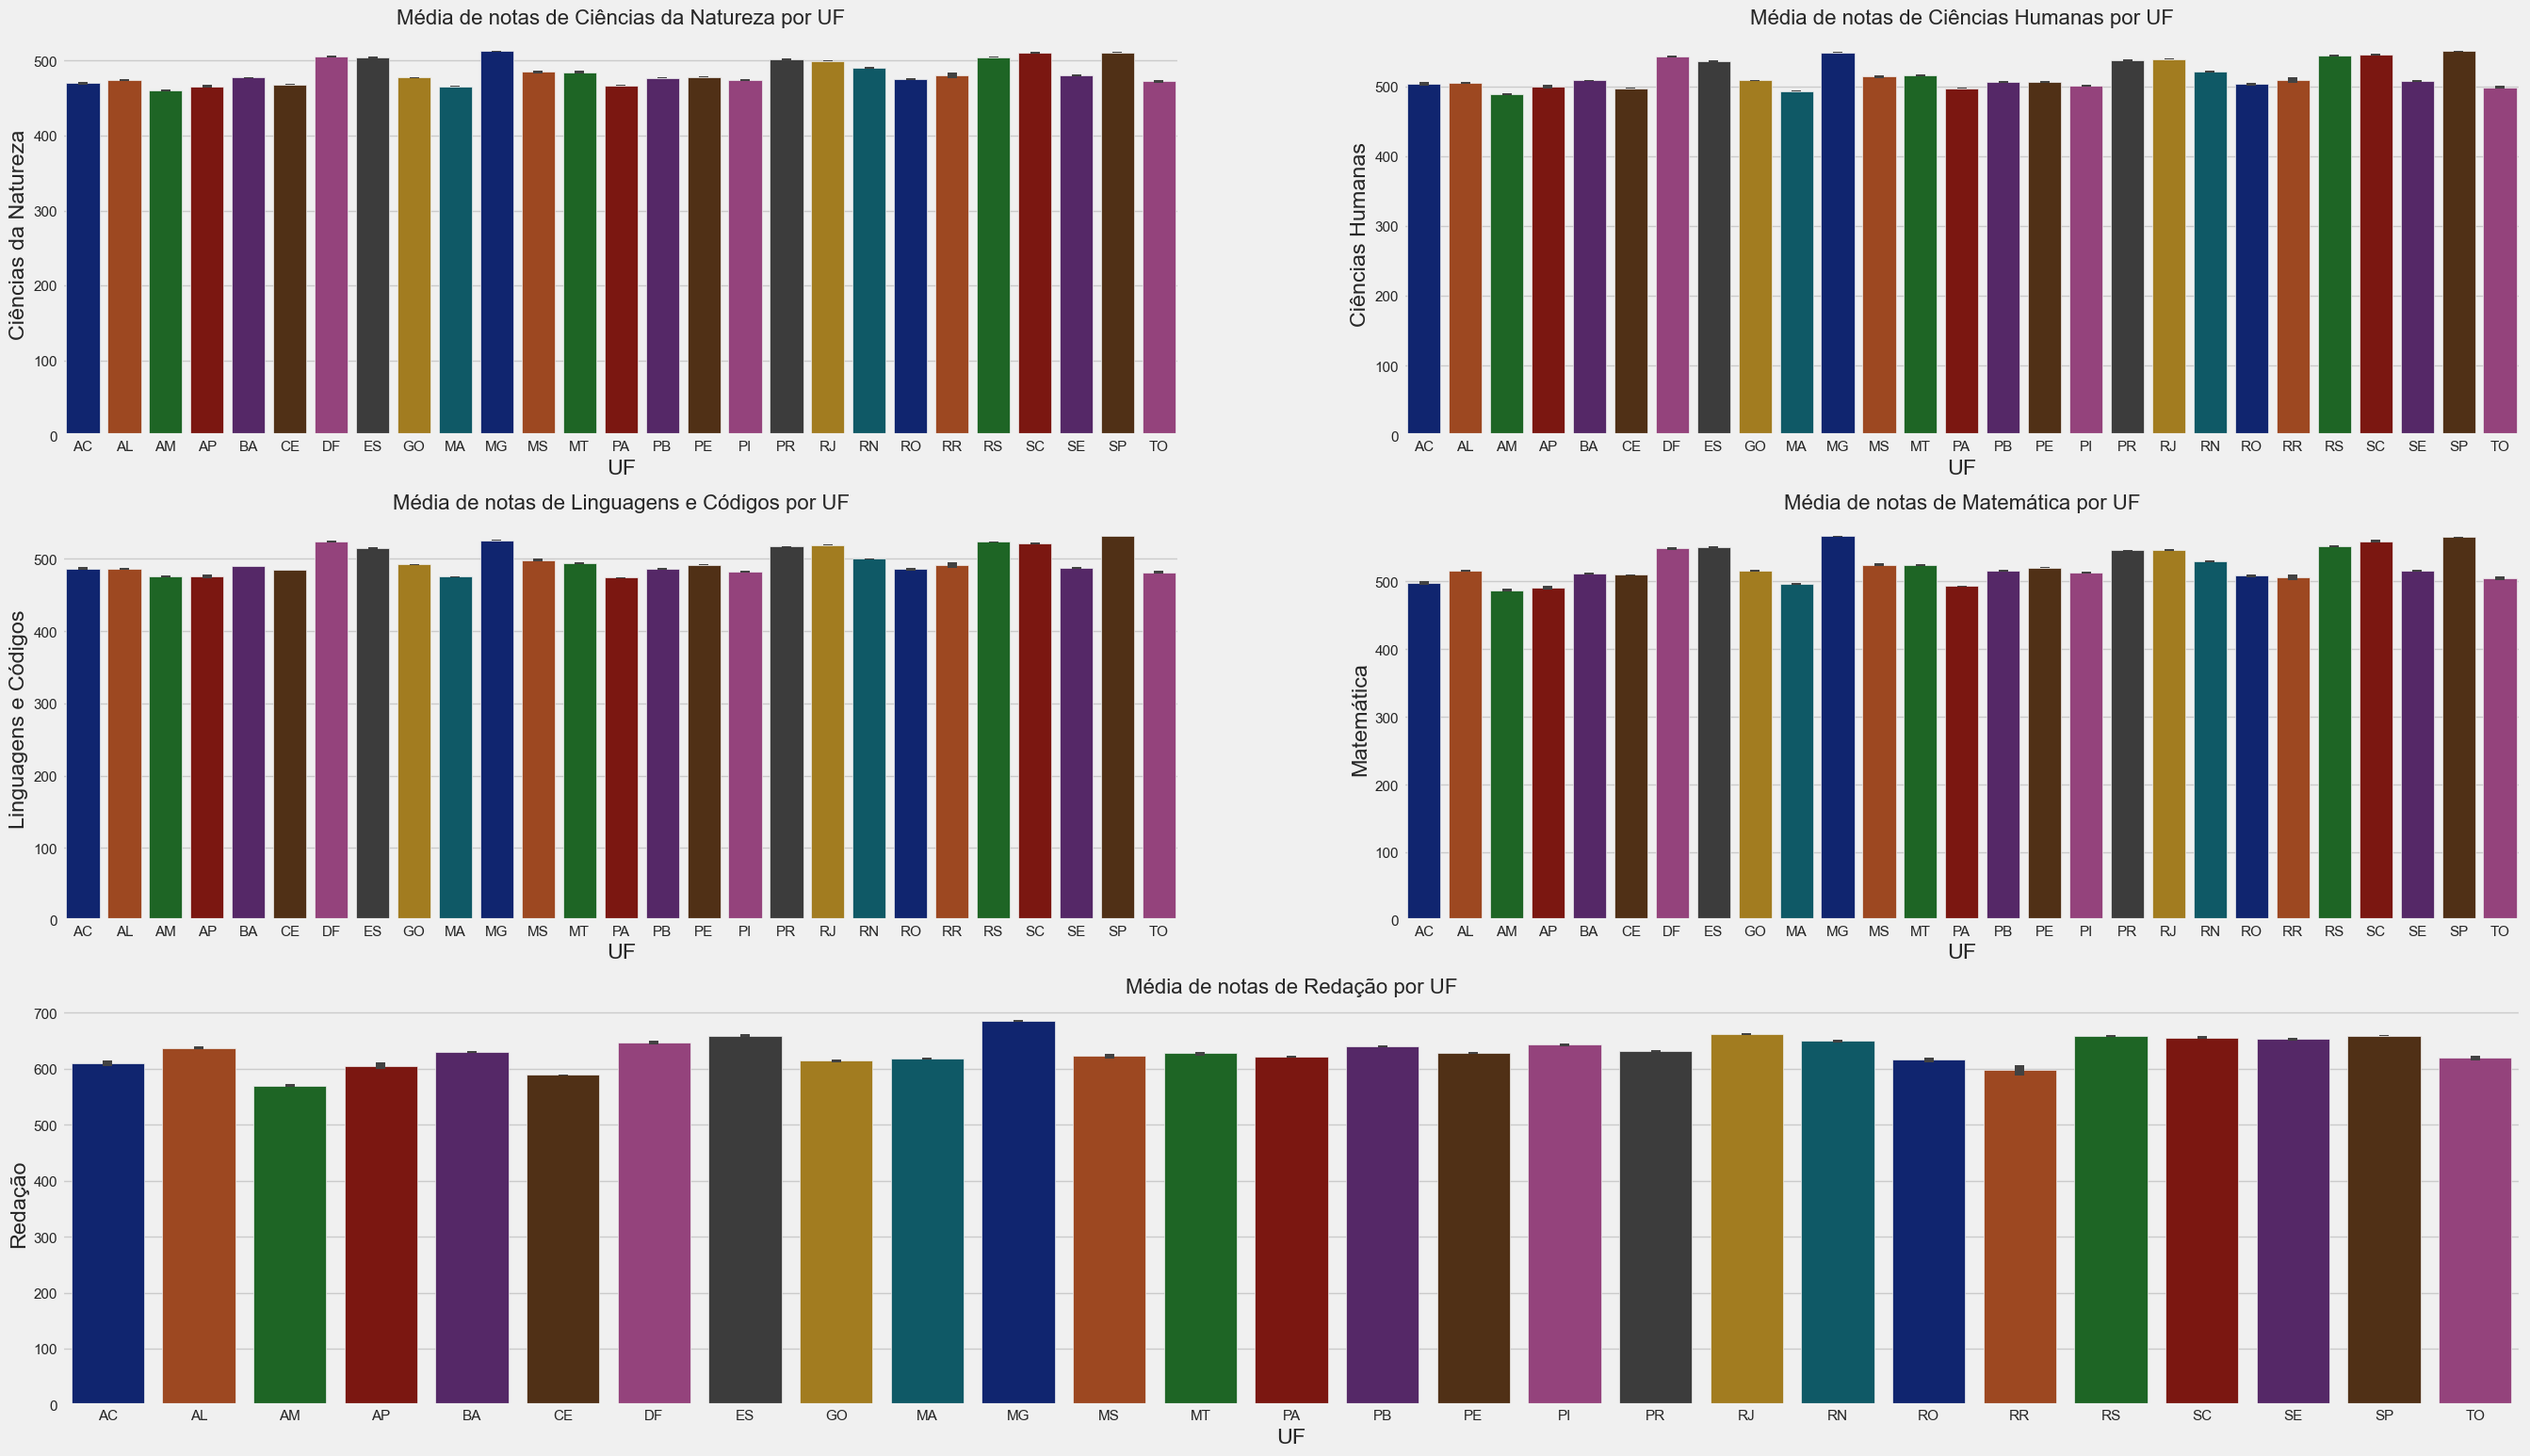

<IPython.core.display.Javascript object>

In [49]:
# Plotando um dashboard comparando as notas de todas as matérias por estado
plt.figure(figsize=(30,18))

fig = plt.figure(figsize=(30,18))
specs = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
                
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, 0])
ax4 = fig.add_subplot(specs[1, 1])
ax5 = fig.add_subplot(specs[2, :])

sns.barplot(y = data_notas['Ciências da Natureza'], x = data_uf.UF.sort_values(ascending=True), palette='dark', 
            dodge=False, ax=ax1).set_title(f'Média de notas de {data_col[0]} por UF', fontsize=16) 
sns.barplot(y = data_notas['Ciências Humanas'], x = data_uf.UF.sort_values(ascending=True), palette='dark', 
            dodge=False, ax=ax2).set_title(f'Média de notas de {data_col[1]} por UF', fontsize=16)
sns.barplot(y = data_notas['Linguagens e Códigos'], x = data_uf.UF.sort_values(ascending=True), palette='dark', 
            dodge=False, ax=ax3).set_title(f'Média de notas de {data_col[2]} por UF', fontsize=16)
sns.barplot(y = data_notas['Matemática'], x = data_uf.UF.sort_values(ascending=True), palette='dark',
            dodge=False, ax=ax4).set_title(f'Média de notas de {data_col[3]} por UF', fontsize=16)
sns.barplot(y = data_notas['Redação'], x = data_uf.UF.sort_values(ascending=True), palette='dark', 
            dodge=False, ax=ax5).set_title(f'Média de notas de {data_col[4]} por UF', fontsize=16);

### 6. CALCULAR PERCENTUAL DE ALUNOS FALTANTES

#### 6.1 POR ESTADO

In [50]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Idade
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,20 anos
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,Entre 31 e 35 anos
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B,Entre 36 e 40 anos
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,18 anos
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,17 anos


<IPython.core.display.Javascript object>

In [51]:
# Renomeando as colunas do df 'dados'
dados.rename(columns = {'TP_PRESENCA_CN': 'Presença em ciências da natureza',
                        'TP_PRESENCA_CH':'Presença em ciências humanas',
                        'TP_PRESENCA_LC': 'Presença em linguagens e códigos',
                        'TP_PRESENCA_MT':'Presença em matemática', 'SG_UF_PROVA':'UF'}, inplace=True),
dados[['Presença em ciências da natureza','Presença em ciências humanas',
       'Presença em linguagens e códigos','Presença em matemática']].head()

(None,)

,Presença em ciências da natureza,Presença em ciências humanas,Presença em linguagens e códigos,Presença em matemática
0,0,1,1,0
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1


<IPython.core.display.Javascript object>

In [103]:
# Variavel 'dados_presence_lc' com base em localização dos 'dados['Presença em linguagens e códigos'] == 0 (faltantes)' 
#e contando os valores descendentemente
dados_presence_lc = pd.DataFrame(
    dados[['Presença em linguagens e códigos','UF']].loc[dados['Presença em linguagens e códigos'] == 0].value_counts(
        ascending=False))

# Sorteando os dados pelo estado de maneira ascendente
dados_presence_lc.reset_index(inplace=True)
dados_presence_lc = dados_presence_lc.rename(columns={0:'Faltantes em LC | CH | REDAÇÃO'}, copy=True)
dados_presence_lc.sort_index(ascending=True)
dados_presence_lc.columns

,Presença em linguagens e códigos,UF,Faltantes em LC | CH | REDAÇÃO
0,0,SP,26958
1,0,CE,25888
2,0,GO,19663
3,0,MG,18535
4,0,BA,17379
5,0,RJ,16166
6,0,PE,12568
7,0,PA,11872
8,0,PR,8211
9,0,RS,8168


Index(['Presença em linguagens e códigos', 'UF',
       'Faltantes em LC | CH | REDAÇÃO'],
      dtype='object')

<IPython.core.display.Javascript object>

In [101]:
# Variavel 'dados_presence_mt' com base em localização dos 'dados['Presença em matemática'] == 0 (faltantes)' 
#e contando os valores descendentemente
dados_presence_mt = pd.DataFrame(
    dados[['Presença em matemática','UF']].loc[dados['Presença em matemática'] == 0].value_counts(
        ascending=False))
dados_presence_mt.reset_index(inplace=True)
dados_presence_mt = dados_presence_mt.rename(columns={0:'Faltantes em MT | CN'}, copy=True)
dados_presence_mt.sort_index(ascending=True)
dados_presence_mt.columns

,Presença em matemática,UF,Faltantes em MT | CN
0,0,SP,31971
1,0,CE,29505
2,0,GO,22047
3,0,MG,21608
4,0,BA,20306
5,0,RJ,19327
6,0,PE,14711
7,0,PA,13976
8,0,PR,9828
9,0,RS,9797


Index(['Presença em matemática', 'UF', 'Faltantes em MT | CN'], dtype='object')

<IPython.core.display.Javascript object>

In [104]:
# concatenando as variavel para um unico DF
# dados_all_faltantes_uf = pd.concat([dados_presence_lc[['UF', 0]], dados_presence_mt[0]], join='outer', axis=1)
dados_all_faltantes_uf = pd.concat([dados_presence_lc[['UF','Faltantes em LC | CH | REDAÇÃO']], 
                                    dados_presence_mt['Faltantes em MT | CN']], axis=1)
dados_all_faltantes_uf =dados_all_faltantes_uf
dados_all_faltantes_uf.sort_index(ascending=True)

,UF,Faltantes em LC | CH | REDAÇÃO,Faltantes em MT | CN
0,SP,26958,31971
1,CE,25888,29505
2,GO,19663,22047
3,MG,18535,21608
4,BA,17379,20306
5,RJ,16166,19327
6,PE,12568,14711
7,PA,11872,13976
8,PR,8211,9828
9,RS,8168,9797


<IPython.core.display.Javascript object>

#### 6.2 POR SEXO

In [55]:
# Renomeando as colunas do df 'dados'
dados.rename(columns={'TP_SEXO':'Sexo'}, inplace=True) # renomeando coluna de sexo

<IPython.core.display.Javascript object>

In [56]:
# teste de validação da renomeação da coluna
dados.head() 

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,Sexo,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,UF,Presença em ciências da natureza,Presença em ciências humanas,Presença em linguagens e códigos,Presença em matemática,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Idade
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,20 anos
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,Entre 31 e 35 anos
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B,Entre 36 e 40 anos
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,18 anos
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,17 anos


<IPython.core.display.Javascript object>

In [57]:
# agrupando coluna sexo e presença na matéria de ciências da natureza, e localizando apenas as linhas 
#que contenham presença na matéria igual a 0 ( 0 = aluno faltante)
dados_cn_mt_sex =dados[['Sexo','Presença em ciências da natureza']].loc[dados['Presença em ciências da natureza'] == 0] 

# contando os valores para Masculino e Feminino e transformando de serie para DataFrame.
dados_cn_mt_sex = pd.DataFrame(dados_cn_mt_sex.value_counts()) 

# Renomeando a coluna 0 para 'Presença em CN/MT'
dados_cn_mt_sex.rename(columns={0: 'Presença em CN/MT'}, inplace=True)

# Resetando o index do df
dados_cn_mt_sex.reset_index()

,Sexo,Presença em ciências da natureza,Presença em CN/MT
0,F,0,177922
1,M,0,88915


<IPython.core.display.Javascript object>

In [58]:
# agrupando coluna sexo e presença na matéria de ciências humanas, e localizando apenas as linhas 
#que contenham presença na matéria igual a 0 ( 0 = aluno faltante)
dados_ch_lc_sex =dados[['Sexo','Presença em ciências humanas']].loc[dados['Presença em ciências humanas'] == 0]

# contando os valores para Masculino e Feminino e transformando de serie para DataFrame.
dados_ch_lc_sex = pd.DataFrame(dados_ch_lc_sex.value_counts()) 

# Renomeando a coluna 0 para 'Presença em CH/LC'
dados_ch_lc_sex.rename(columns={0: 'Presença em CH/LC'}, inplace=True)

# Resetando o index do df
dados_ch_lc_sex.reset_index()

,Sexo,Presença em ciências humanas,Presença em CH/LC
0,F,0,151022
1,M,0,76968


<IPython.core.display.Javascript object>

In [59]:
# Juntando os df's 'dados_cn_mt_sex' e 'dados_ch_lc_sex'
dados_all_sex = dados_cn_mt_sex.merge(dados_ch_lc_sex, right_index=True, left_index=True)

# Resetando o index do df
dados_all_sex.reset_index(inplace=True)

# Dropando as colunas 'Presença em ciências da natureza' e 'Presença em ciências humanas'
dados_all_sex.drop(columns=['Presença em ciências da natureza','Presença em ciências humanas'], inplace=True)
dados_all_sex

,Sexo,Presença em CN/MT,Presença em CH/LC
0,F,177922,151022
1,M,88915,76968


<IPython.core.display.Javascript object>

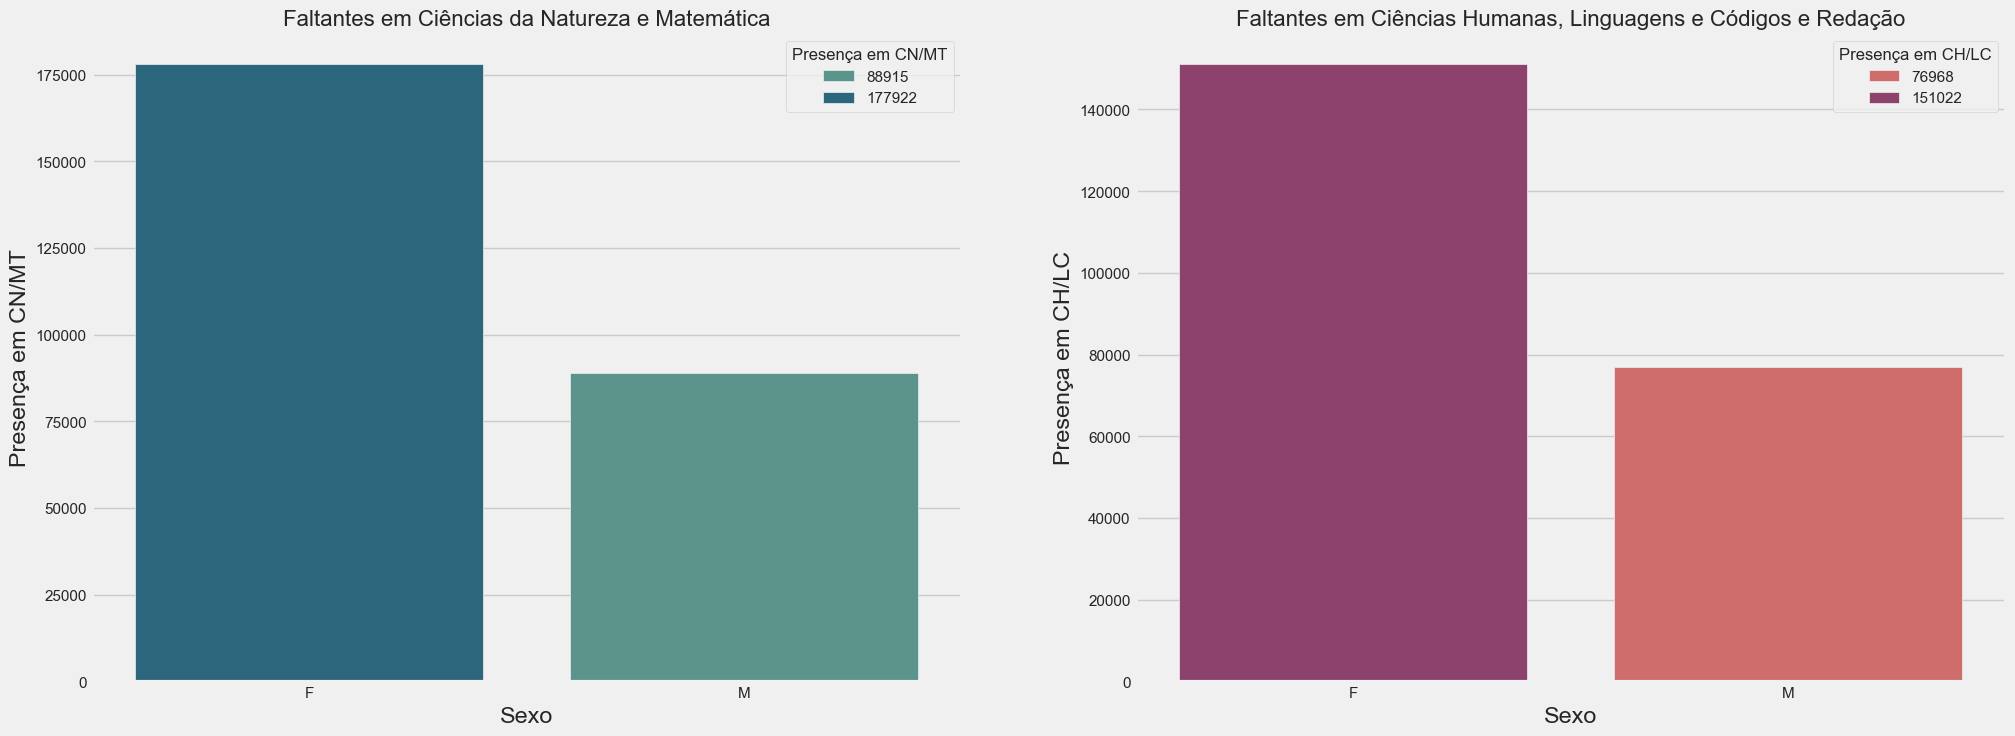

<IPython.core.display.Javascript object>

In [92]:
# Plotando os resultados referente a 'Presença em CN/MT' e 'Presença em CH/LC'
fig = plt.figure(figsize=(22,8))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

sns.barplot(y = dados_all_sex['Presença em CN/MT'], x=dados_all_sex['Sexo'], ax=ax1, palette='crest', dodge=False, 
            hue=dados_all_sex['Presença em CN/MT']).set_title(
    'Faltantes em Ciências da Natureza e Matemática', 
                                                              fontsize=16);
# sns.move_legend(ax1, loc='upper right', bbox_to_anchor=(1.145, 1.012)) # código usado em um teste com legenda

sns.barplot(y= dados_all_sex['Presença em CH/LC'], x=dados_all_sex['Sexo'], ax=ax2, palette="flare", dodge=False,
            hue=dados_all_sex['Presença em CH/LC']).set_title(
    'Faltantes em Ciências Humanas, Linguagens e Códigos e Redação', 
                                                              fontsize=16);
# plt.legend(bbox_to_anchor=(1.145, 1.012)); # código usado em um teste com legenda

#### 6.3 POR FAIXA ETARIA

In [93]:
# Variavel 'dados_faixa_etaria' com os dados das colunas 'Presença em ciências da natureza', 
#'Presença em ciências humanas' e Idade'
dados_faixa_etaria = dados[['Presença em ciências da natureza', 'Presença em ciências humanas','Idade']]

# Criando a variavel 'dados_cn_faixa' com a tranformação da variavel 'dados_faixa_etaria' em df, dropando a coluna 
#'Presença em ciências humanas', localizando os valores iguais a 0 na coluna 'Presença em ciências da natureza' 
#e contando os valores
dados_cn_faixa = pd.DataFrame(dados_faixa_etaria.drop(
    columns='Presença em ciências humanas').loc[dados_faixa_etaria[
    'Presença em ciências da natureza'] == 0].value_counts())

# Resetando o index da variavel
dados_cn_faixa.reset_index(inplace=True)
dados_cn_faixa = dados_cn_faixa.rename(columns={0: 'Faltantes no 2° dia'}, copy=True)
dados_cn_faixa

,Presença em ciências da natureza,Idade,Faltantes no 2° dia
0,0,18 anos,56084
1,0,19 anos,38831
2,0,17 anos,32343
3,0,20 anos,25670
4,0,Entre 26 e 30 anos,20783
5,0,21 anos,17791
6,0,22 anos,12952
7,0,Entre 31 e 35 anos,11150
8,0,23 anos,9673
9,0,Abaixo de 17 anos,8644


<IPython.core.display.Javascript object>

In [62]:
# Criando a variavel 'dados_ch_faixa' com a tranformação da variavel 'dados_faixa_etaria' em df, dropando a coluna 
#'Presença em ciências da natureza', localizando os valores iguais a 0 na coluna 'Presença em ciências humanas' 
#e contando os valores
dados_ch_faixa = pd.DataFrame(dados_faixa_etaria.drop(
    columns='Presença em ciências da natureza').loc[dados_faixa_etaria[
    'Presença em ciências humanas']==0].value_counts())

# Resetando o index da variavel
dados_ch_faixa.reset_index(inplace=True)
dados_ch_faixa = dados_ch_faixa.rename(columns={0: 'Faltantes no 1° dia'}, copy=True)
dados_ch_faixa

,Presença em ciências humanas,Idade,Faltantes no 1° dia
0,0,18 anos,46509
1,0,19 anos,33650
2,0,17 anos,24872
3,0,20 anos,22677
4,0,Entre 26 e 30 anos,18920
5,0,21 anos,15774
6,0,22 anos,11518
7,0,Entre 31 e 35 anos,10179
8,0,23 anos,8714
9,0,24 anos,7521


<IPython.core.display.Javascript object>

In [94]:
# concatenando as variaveis para df
dados_all_faixa_etaria = pd.concat([dados_ch_faixa[['Idade',
                                                    'Faltantes no 1° dia']],dados_cn_faixa[
    'Faltantes no 2° dia']],axis=1)
dados_all_faixa_etaria

,Idade,Faltantes no 1° dia,Faltantes no 2° dia
0,18 anos,46509,56084
1,19 anos,33650,38831
2,17 anos,24872,32343
3,20 anos,22677,25670
4,Entre 26 e 30 anos,18920,20783
5,21 anos,15774,17791
6,22 anos,11518,12952
7,Entre 31 e 35 anos,10179,11150
8,23 anos,8714,9673
9,24 anos,7521,8644


<IPython.core.display.Javascript object>

#### 6.4 GRAU SOCIOECONOMICO.

In [64]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,Sexo,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,UF,Presença em ciências da natureza,Presença em ciências humanas,Presença em linguagens e códigos,Presença em matemática,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Idade
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,20 anos
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,Entre 31 e 35 anos
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B,Entre 36 e 40 anos
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,18 anos
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,17 anos


<IPython.core.display.Javascript object>

In [65]:
# Variavel 'dados_falta_socio' com os dados das colunas 'Presença em ciências da natureza', '
#Presença em ciências humanas' e 'Q006'
dados_falta_socio = dados[['Presença em ciências da natureza','Presença em ciências humanas','Q006']]

# Renomeando e dropando as colunas do df
dados_falta_socio = dados_falta_socio.rename(
    columns={'Presença em ciências da natureza': 'Presença em CN/MT',
             'Presença em ciências humanas': 'Presença em CH/LC/REDAÇÃO','Q006':'Faixa de renda'}, copy=True).drop(
    columns= 'Presença em CH/LC/REDAÇÃO')

# Criando a variavel variavel 'dados_falta_socio_exatas' 
dados_falta_socio_exatas = dados_falta_socio

# Resetando os index do df
dados_falta_socio_exatas = dados_falta_socio_exatas.reset_index(inplace=True)

# Juntando 'dados_falta_socio_exatas' com 'data_socioeconomico['Renda']
dados_falta_socio_exatas = dados_falta_socio.merge(
    data_socioeconomico['Renda'], left_index=True, right_index=True)

# Dropando as colunas 'index' e 'Faixa de renda'
dados_falta_socio_exatas.drop(columns=['index','Faixa de renda'], inplace=True)

# Transformando novamente em um dataframe para poder contar os valores
dados_falta_socio_exatas = pd.DataFrame(
    dados_falta_socio_exatas.loc[dados_falta_socio_exatas['Presença em CN/MT'] == 0].value_counts(
        ascending=False))

# Renomeando a coluna 0 para 'Faltantes'
dados_falta_socio_exatas.rename(columns= {0: 'Faltantes'}, inplace=True)

# Resetando os indexs do df e printando o resultado
dados_falta_socio_exatas.reset_index(inplace=True)
dados_falta_socio_exatas.drop(index=17)

,Presença em CN/MT,Renda,Faltantes
0,0,"Até 1.100,00",56796
1,0,"De 1.100,01 até 1.650,00",32183
2,0,"De 1.650,01 até 2.200,00",23458
3,0,"De 2.750,01 até 3.300,00",13126
4,0,Nenhuma Renda,11999
5,0,"De 2.200,01 até 2.750,00",11562
6,0,"De 3.300,01 até 4.400,00",10717
7,0,"De 4.400,01 até 5.500,00",8271
8,0,"De 5.500,01 até 6.600,00",5055
9,0,"De 6.600,01 até 7.700,00",3124


<IPython.core.display.Javascript object>

In [66]:
# Variavel 'dados_falta_socio' com os dados das colunas 'Presença em ciências da natureza', '
#Presença em ciências humanas' e 'Q006'
dados_falta_socio = dados[['Presença em ciências da natureza','Presença em ciências humanas','Q006']]

# Renomeando e dropando as colunas do df
dados_falta_socio = dados_falta_socio.rename(
    columns={'Presença em ciências da natureza': 'Presença em CN/MT',
             'Presença em ciências humanas': 'Presença em CH/LC/REDAÇÃO','Q006':'Faixa de renda'}, copy=True).drop(
    columns= 'Presença em CN/MT')

# Criando a variavel 'dados_falta_socio_humanas' 
dados_falta_socio_humanas = dados_falta_socio

# Resetando os index do df
dados_falta_socio_humanas = dados_falta_socio_humanas.reset_index(inplace=True)

# Juntando 'dados_falta_socio_humanas' com 'data_socioeconomico['Renda']
dados_falta_socio_humanas = dados_falta_socio.merge(
    data_socioeconomico['Renda'], left_index=True, right_index=True)

# Dropando as colunas 'index' e 'Faixa de renda'
dados_falta_socio_humanas.drop(columns=['index','Faixa de renda'], inplace=True)

# Transformando novamente em um dataframe para poder contar os valores
dados_falta_socio_humanas = pd.DataFrame(
    dados_falta_socio_humanas.loc[dados_falta_socio_humanas['Presença em CH/LC/REDAÇÃO'] == 0].value_counts(
        ascending=False))
    
# Renomeando a coluna 0 para 'Faltantes'
dados_falta_socio_humanas.rename(columns= {0: 'Faltantes'}, inplace=True)
    
# Resetando os indexs do df e printando o resultado
dados_falta_socio_humanas.reset_index(inplace=True)
dados_falta_socio_humanas.drop(index=17)

,Presença em CH/LC/REDAÇÃO,Renda,Faltantes
0,0,"Até 1.100,00",48334
1,0,"De 1.100,01 até 1.650,00",27316
2,0,"De 1.650,01 até 2.200,00",19997
3,0,"De 2.750,01 até 3.300,00",11025
4,0,Nenhuma Renda,10166
5,0,"De 2.200,01 até 2.750,00",9847
6,0,"De 3.300,01 até 4.400,00",9172
7,0,"De 4.400,01 até 5.500,00",7027
8,0,"De 5.500,01 até 6.600,00",4282
9,0,"De 6.600,01 até 7.700,00",2647


<IPython.core.display.Javascript object>

In [67]:
# Juntando os dois DF's para melhor visualização da diferença
dados_all_faltantes = dados_falta_socio_exatas.merge(
    dados_falta_socio_humanas[['Presença em CH/LC/REDAÇÃO','Faltantes']], right_index=True, left_index=True)

dados_all_faltantes = dados_all_faltantes.rename(
    columns={'Faltantes_x': 'Faltantes Exatas', 'Faltantes_y':'Faltantes Humanas'}, copy=True)

dados_all_faltantes.drop(columns=['Presença em CN/MT','Presença em CH/LC/REDAÇÃO'], inplace=True)

dados_all_faltantes = dados_all_faltantes[['Faltantes Exatas','Faltantes Humanas','Renda']]
dados_all_faltantes.drop(index=17)

,Faltantes Exatas,Faltantes Humanas,Renda
0,56796,48334,"Até 1.100,00"
1,32183,27316,"De 1.100,01 até 1.650,00"
2,23458,19997,"De 1.650,01 até 2.200,00"
3,13126,11025,"De 2.750,01 até 3.300,00"
4,11999,10166,Nenhuma Renda
5,11562,9847,"De 2.200,01 até 2.750,00"
6,10717,9172,"De 3.300,01 até 4.400,00"
7,8271,7027,"De 4.400,01 até 5.500,00"
8,5055,4282,"De 5.500,01 até 6.600,00"
9,3124,2647,"De 6.600,01 até 7.700,00"


<IPython.core.display.Javascript object>

### 7. CALCULAR A MÉDIA SOCIOECONÔMICA DOS ALUNOS QUE PRESTARAM AS PROVAS

In [68]:
# Variavel 'data_socioeconomico' com a transformação da variavel 'data_socioeconomico' em 
#um dataframe que teve a contagem dos valores para destaque da distribuição
data_socioeconomico = pd.DataFrame(data_socioeconomico.value_counts()).reset_index()

# Renomenando a coluna 0 para 'distribuiução'
data_socioeconomico.rename(columns={0: 'Distribuição'}, inplace=True)
data_socioeconomico

,Faixa de renda familiar,Renda,Distribuição
0,B,"Até 1.100,00",230501
1,C,"De 1.100,01 até 1.650,00",130659
2,D,"De 1.650,01 até 2.200,00",95806
3,F,"De 2.750,01 até 3.300,00",52854
4,A,Nenhuma Renda,48829
5,E,"De 2.200,01 até 2.750,00",46768
6,G,"De 3.300,01 até 4.400,00",43125
7,H,"De 4.400,01 até 5.500,00",32964
8,I,"De 5.500,01 até 6.600,00",20445
9,J,"De 6.600,01 até 7.700,00",12506


<IPython.core.display.Javascript object>

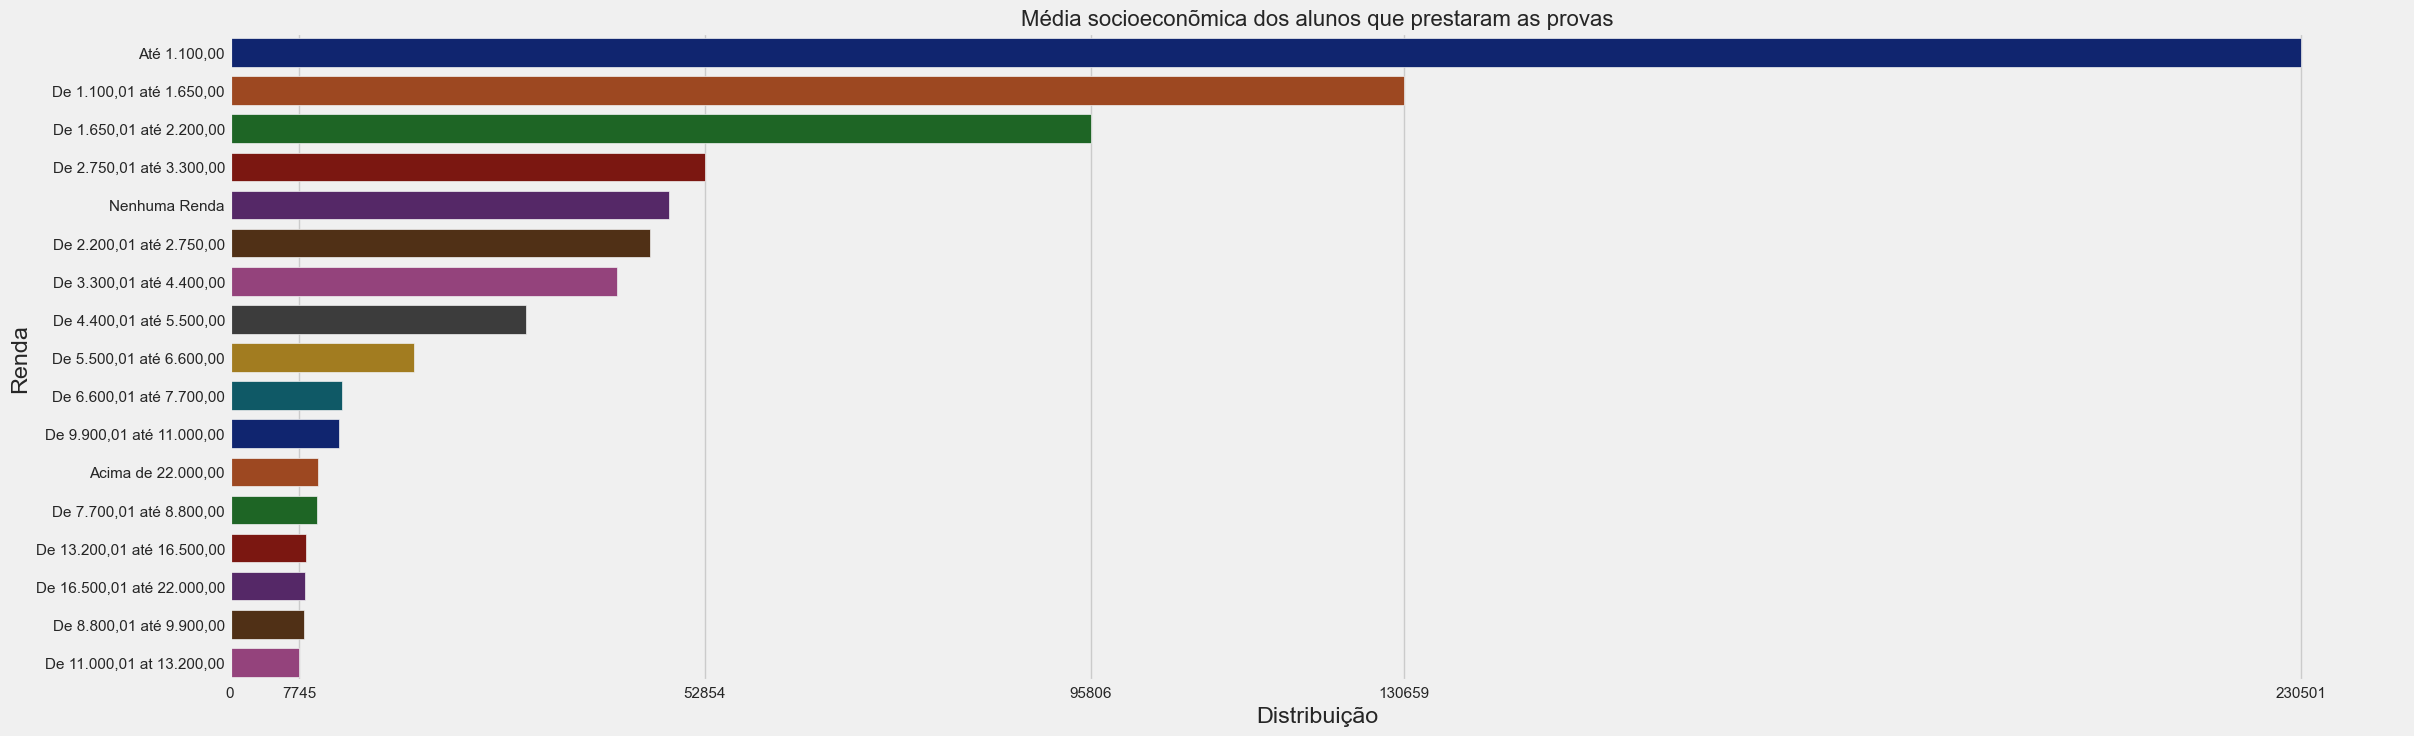

<IPython.core.display.Javascript object>

In [69]:
# Plotando a distribuição dos dados.
plt.figure(figsize=(25,8))
sns.barplot(y=data_socioeconomico['Renda'], x = data_socioeconomico['Distribuição'], dodge=True, 
            palette='dark', width=0.75).set_title('Média socioeconõmica dos alunos que prestaram as provas', 
                                                  fontsize=16)
plt.xticks([0,230501,130659,95806,52854,7745]);

### 8. CALCULAR MEDIANA DE PONTOS DOS TREINEIROS

In [70]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,210052384164,2021,12,M,1,1,1,1,11,1,0,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
3,210052128335,2021,3,M,1,3,1,2,0,2,0,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,0,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,0,MG,1,1,1,1,910.0,879.0,889.0,900.0,487.4,476.5,450.7,493.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB,BDBCDAAEEBEAABEDEBAACCCCBABCCAAEBBCABAEAEDEDA,BADBB99999BDDEDAEEEDEDADEAEAEBAAECBCADADDCEDAB...,CBBCCDDEEEBCBCAEBBEDEACBCABCAEBADCEABEEBCBCEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,80.0,100.0,100.0,520.0,B,B,B,B,2.0,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,0,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B


<IPython.core.display.Javascript object>

In [71]:
# Variavel 'data_train' com a junção das colunas 'IN_TREINEIRO','NU_NOTA_CN',
#'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO' do dataset
data_train = data[['IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

# renomenado as colunas
data_train = data_train.rename(
    columns = {'IN_TREINEIRO':'Treineiro','NU_NOTA_CN':'Ciências da Natureza', 
               'NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
               'NU_NOTA_REDACAO':'Redação'}, copy=True)


# Variavel 'data_treineiro' com a tranformação em dataframe da varivael 'data_train' onde foi localizado 
#'treineiro' == '1'
data_treineiro = pd.DataFrame(data_train.loc[data_train['Treineiro'] == 1].mean())

#5 Renomeando a colunas 'médias'
data_treineiro.rename(columns={0:'Médias'}, inplace=True)

# Excluindo a coluna 'treineiro'
data_treineiro.drop(index='Treineiro', inplace=True)
data_treineiro.round(2)

,Médias
Ciências da Natureza,476.14
Ciências Humanas,510.47
Linguagens e Códigos,499.82
Matemática,527.34
Redação,620.61


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Notas médias dos treineiros')

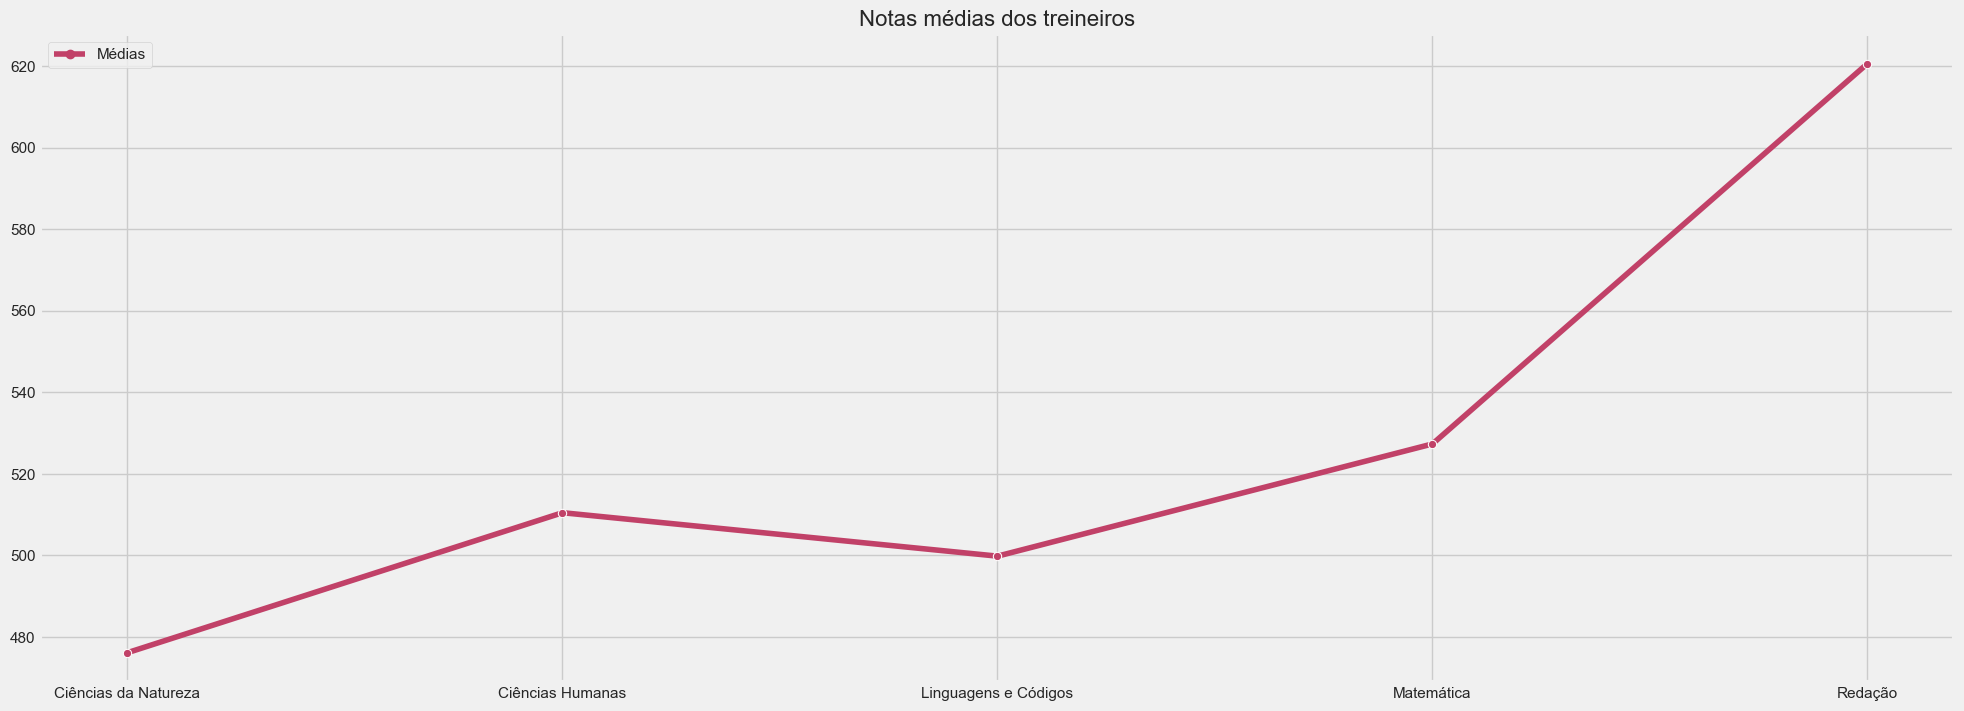

<IPython.core.display.Javascript object>

In [72]:
# plotando em grafico os dados resultantes
fig = plt.figure(figsize=(22,8))
sns.lineplot(data_treineiro, palette='flare', markers=True).set_title('Notas médias dos treineiros', fontsize=16)

### 9. CALCULAR MEDIANA DE PONTOS DOS ALUNOS QUE FAZEM PARA VALER;

In [73]:
# Variavel 'data_serio' com a junção das colunas 'IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
#'NU_NOTA_MT','NU_NOTA_REDACAO' do dataset
data_serio = data[['IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

# renomenado as colunas
data_serio = data_serio.rename(
    columns = {'IN_TREINEIRO':'Treineiro','NU_NOTA_CN':'Ciências da Natureza', 
               'NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
               'NU_NOTA_REDACAO':'Redação'}, copy=True)

# Variavel 'data_serio' com a tranformação em dataframe da varivael 'data_train' onde foi localizado 
#'treineiro' == '0'
data_serio = pd.DataFrame(data_serio.loc[data_train['Treineiro'] == 0].mean())

# Renomeando a colunas 'médias'
data_serio.rename(columns={0:'Médias'}, inplace=True)

# Excluindo a coluna 'treineiro'
data_serio.drop(index='Treineiro', inplace=True)
data_serio.round(2)

,Médias
Ciências da Natureza,490.08
Ciências Humanas,523.16
Linguagens e Códigos,503.34
Matemática,531.57
Redação,640.66


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Notas médias dos alunos que fazem para valer')

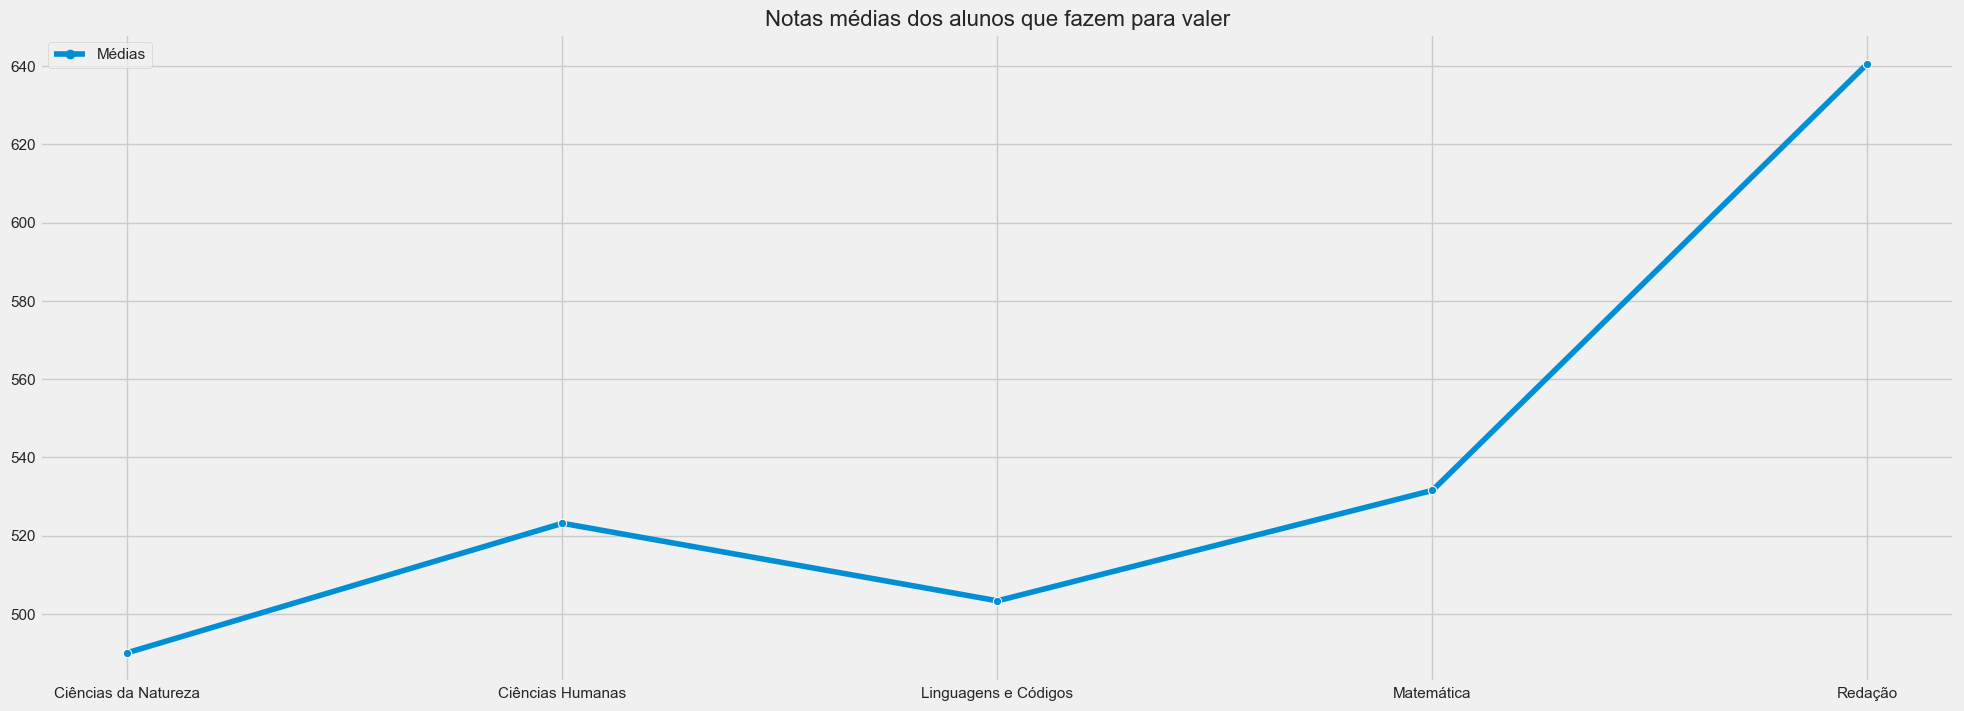

<IPython.core.display.Javascript object>

In [74]:
# plotando em grafico os dados resultantes
fig = plt.figure(figsize=(22,8))
sns.lineplot(data_serio, markers=True).set_title('Notas médias dos alunos que fazem para valer', fontsize=16)

### 10. CONFRONTAR MEDIANA ENTRE TREINEIROS X ALUNOS SÉRIOS;

In [75]:
# Jutando os dois df 'data_treineiros' e 'data_serio'
data_diferença = data_treineiro.merge(data_serio['Médias'], right_index=True, left_index=True, copy=True)

# Renomeando as colunas dos treineiros e dos que fazem para valer
data_diferença = data_diferença.rename(
    columns={'Médias_x': 'Alunos Treineiros', 
             'Médias_y':'Alunos que fizeram para valer'}, copy=True).unstack(level=-1)

# Criando uma variavel para visualização da diferença para o dashboard e transformando os index em colunas
data_dif_dash = pd.DataFrame(data_diferença).unstack(level=-2)[0]

# Resetando os index para manuseio das colunas
data_dif_dash.reset_index(inplace=True)

# Renomenado a colunas 'index' para 'Matérias'
data_dif_dash.rename(columns={'index':'Matérias'}, inplace=True)

# Arredondando o resultado para até 2 casas decimais
data_dif_dash = data_dif_dash.round(2)

# Calculando a diferença entre alunos que fazem para valer e treinerios
data_dif = (data_diferença['Alunos que fizeram para valer'] / data_diferença['Alunos Treineiros'] * 100) - 100
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 2.03%


<IPython.core.display.Javascript object>

In [76]:
data_dif_dash

,Matérias,Alunos Treineiros,Alunos que fizeram para valer
0,Ciências da Natureza,476.14,490.08
1,Ciências Humanas,510.47,523.16
2,Linguagens e Códigos,499.82,503.34
3,Matemática,527.34,531.57
4,Redação,620.61,640.66


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Notas Treineiros')

Text(0.5, 1.0, 'Notas de alunos que fizeram para valer')

Text(0.5, 1.0, 'Comparativo Notas de alunos que fizeram para valer x Notas Treineiros')

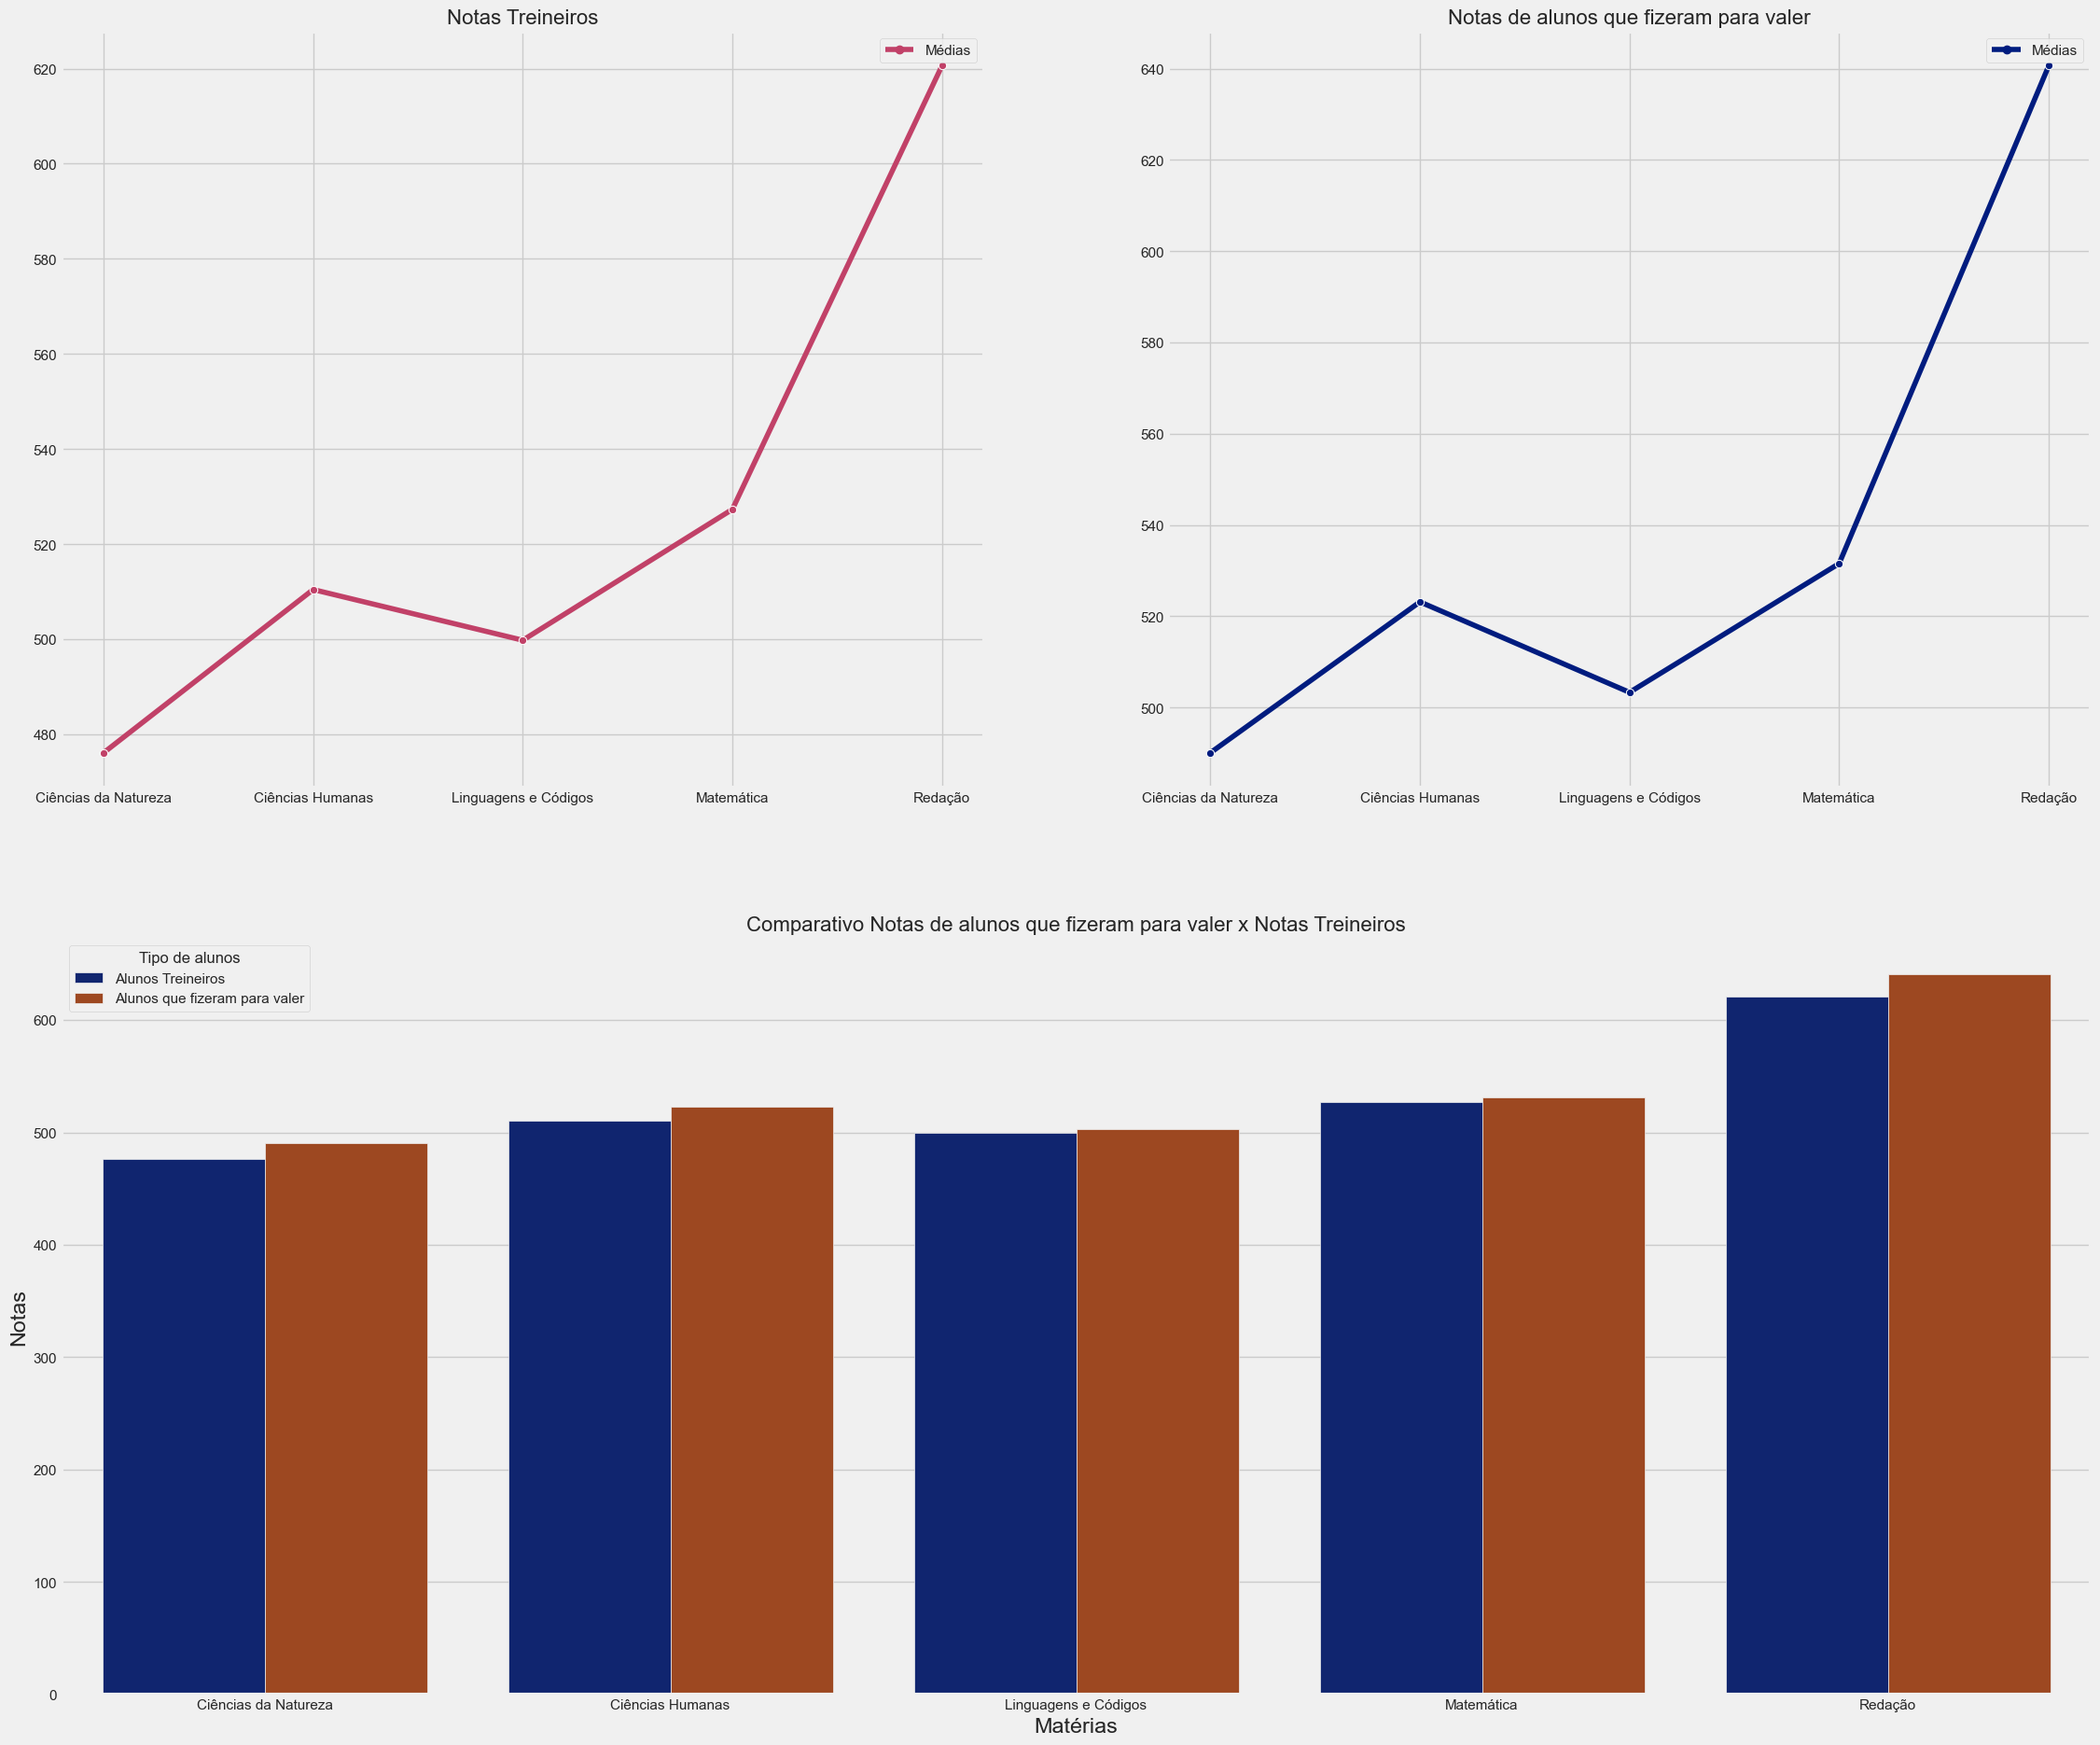

<IPython.core.display.Javascript object>

In [77]:
#5. Dashboard comparativo das notas dos alunos que fizeram para valer vs alunos treineiros
fig = plt.figure(figsize=(25,22))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
                
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, :])

sns.lineplot(data = data_treineiro, palette='flare', markers = True, 
             ax=ax1).set_title('Notas Treineiros', fontsize=16) #ajustar palette de cores.
sns.lineplot(data = data_serio, palette='dark', markers = True, 
             ax=ax2).set_title('Notas de alunos que fizeram para valer', fontsize=16) #ajustar palette de cores.
sns.barplot(data=data_dif_dash.melt(
    id_vars='Matérias', value_name='Notas', var_name='Tipo de alunos'), x='Matérias', y='Notas', 
    hue= 'Tipo de alunos', palette='dark', ax=ax3).set_title(
    'Comparativo Notas de alunos que fizeram para valer x Notas Treineiros', fontsize=16)

### 11. CALCULAR A IDADE E O PERCENTUAL DE PARTICIPANTES DE CADA FAIXA ETÁRIA

In [78]:
values_custom

,Faixas Etárias,Valores,Em % (percentual),idade
0,3,215931,27.72,18 anos
1,2,200765,25.77,17 anos
2,4,98886,12.69,19 anos
3,1,60146,7.72,Abaixo de 17 anos
4,5,54298,6.97,20 anos
5,6,32376,4.16,21 anos
6,11,24951,3.20,Entre 26 e 30 anos
7,7,21384,2.75,22 anos
8,8,14567,1.87,23 anos
9,12,12861,1.65,Entre 31 e 35 anos


<IPython.core.display.Javascript object>

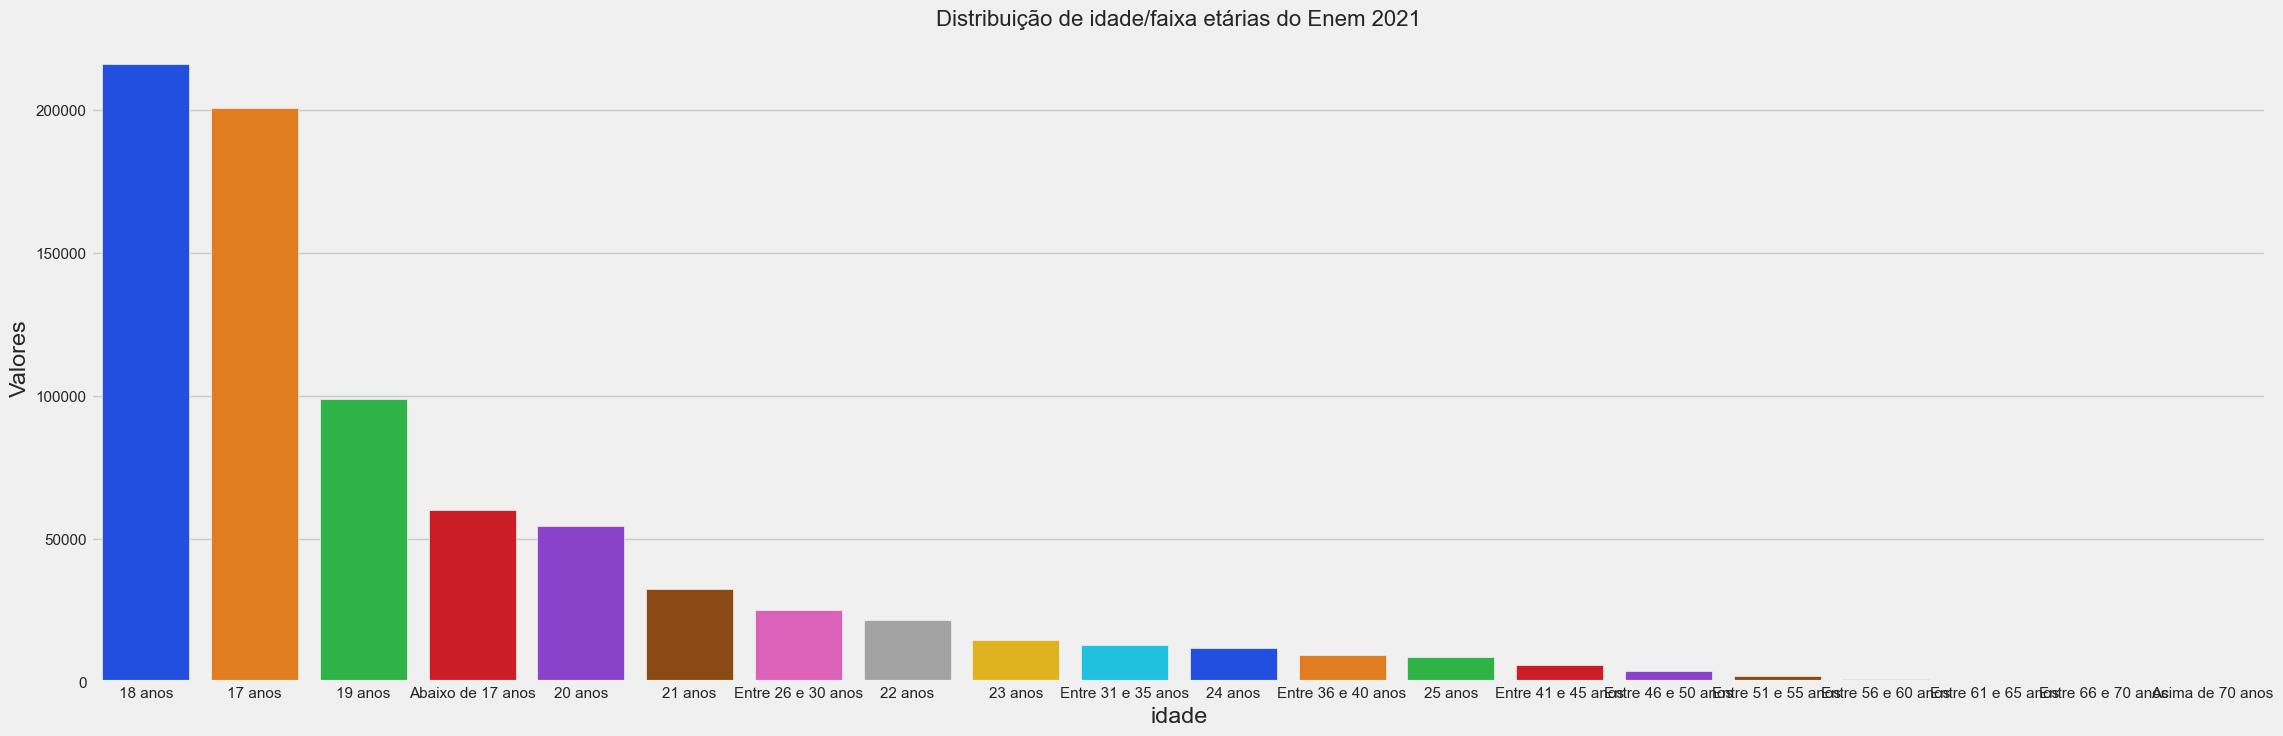

<IPython.core.display.Javascript object>

In [79]:
# Grafico da distribuição dos participantes do enem por faixa etaria
plt.figure(figsize=(25,8))
sns.barplot(y=values_custom['Valores'], x=values_custom['idade'], 
            palette='bright').set_title(f'Distribuição de idade/faixa etárias do Enem 2021', fontsize=16);

### 12. COMPARAR QUAL A IDADE/FAIXA ETARIA QUE TEVE A MAIOR MÉDIA DE NOTAS;

In [80]:
# Criando a variavel 'data_idade'
data_idade = data[['TP_FAIXA_ETARIA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

# Renomeando as colunas da variavel 'data_idade'
data_idade = data_idade.rename(
    columns={'TP_FAIXA_ETARIA':'Faixa Etária','NU_NOTA_CN':'Ciências da Natureza', 
             'NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
             'NU_NOTA_REDACAO':'Redação'}, copy=True)
 
# Criando a coluna 'Idade' com valores de idade baseados nos valores da coluna 'faixa etaria'
data_idade['Idade'] = data_idade['Faixa Etária'].apply(
    lambda x: 'Abaixo de 17 anos' if x == 1 else # utilizando o método 'apply' para executar a func de 
              '17 anos' if x == 2 else # atribuir valor das linhas da coluna 'idade' com base no valor 
              '18 anos' if x == 3 else # da coluna 'faixa etaria'
              '19 anos' if x == 4 else
              '20 anos' if x == 5 else
              '21 anos' if x == 6 else
              '22 anos' if x == 7 else
              '23 anos' if x == 8 else
              '24 anos' if x == 9 else
              '25 anos' if x == 10 else
              'Entre 26 e 30 anos' if x == 11 else
              'Entre 31 e 35 anos' if x == 12 else
              'Entre 36 e 40 anos' if x == 13 else
              'Entre 41 e 45 anos' if x == 14 else
              'Entre 46 e 50 anos' if x == 15 else
              'Entre 51 e 55 anos' if x == 16 else
              'Entre 56 e 60 anos' if x == 17 else
              'Entre 61 e 65 anos' if x == 18 else
              'Entre 66 e 70 anos' if x == 19 else 'Acima de 70 anos')
data_idade

,Faixa Etária,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Idade
1,12,505.9,551.8,498.3,461.5,560.0,Entre 31 e 35 anos
3,3,580.7,678.9,638.9,659.5,780.0,18 anos
4,2,497.7,532.4,457.6,582.6,780.0,17 anos
8,8,487.4,476.5,450.7,493.4,520.0,23 anos
9,4,507.6,539.2,494.6,413.3,380.0,19 anos
...,...,...,...,...,...,...,...
1048568,10,541.2,568.5,527.4,514.7,800.0,25 anos
1048569,3,642.1,670.1,584.1,699.0,900.0,18 anos
1048571,11,472.7,646.3,584.1,501.6,720.0,Entre 26 e 30 anos
1048572,3,451.0,498.6,523.2,428.2,580.0,18 anos


<IPython.core.display.Javascript object>

In [81]:
# Variavel 'data_meanns' com a média de nota das materias
data_means = data_idade[['Idade','Ciências da Natureza','Ciências Humanas',
                         'Linguagens e Códigos','Matemática','Redação']]

# Agrupe `data_means` por idade e calcule a média de todas as outras colunas
grouped_means = data_means.groupby('Idade').mean()

# Calcule a média das médias obtidas no passo 2 para cada idade em `data_idade`
data_idade['Médias'] = data_idade['Idade'].map(grouped_means.mean(axis=1))

# Arredonde o resultado final para duas casas decimais, se necessário
data_idade['Médias'] = data_idade['Médias'].round(2)

# Agrupando os dados da variavel 'data_idade' pela coluna 'idade', tirando a média desses valores, 
#arredondando para 2 casas decimais e resetando os indexs.
data_idade = data_idade.groupby('Idade').mean().round(2).reset_index()

# Ordenando os dados descendentemente pela coluna 'média'
data_idade.sort_values('Médias', ascending=False)

,Idade,Faixa Etária,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Médias
5,22 anos,7.0,499.78,532.35,506.76,536.93,646.08,544.38
4,21 anos,6.0,498.37,528.23,505.24,535.56,650.14,543.51
3,20 anos,5.0,494.74,524.52,503.79,533.85,650.55,541.49
6,23 anos,8.0,499.24,532.53,506.78,532.86,633.55,540.99
7,24 anos,9.0,498.98,532.64,506.29,532.97,630.37,540.25
0,17 anos,2.0,486.95,520.79,506.18,537.34,647.08,539.67
8,25 anos,10.0,498.31,534.05,506.22,529.35,623.23,538.23
2,19 anos,4.0,489.45,520.05,502.32,530.70,648.16,538.14
11,Entre 26 e 30 anos,11.0,498.84,538.04,505.55,526.00,607.95,535.28
1,18 anos,3.0,484.54,517.34,501.41,528.26,640.19,534.35


<IPython.core.display.Javascript object>

### 13 COMPARATIVO DAS NOTAS ENTRE ESCOLA PÚBLICA E PRIVADA

In [82]:
# Variavel 'data_public' com a junção da variavel 'data_notas' e da coluna 'tp_escola' do dataset
data_public = data_notas.merge(dados['TP_ESCOLA'], right_index=True, left_index=True)

# Tranformando em um dataframe e localizando os dados da coluna 'tp_escola' == 2 (Escola publica) e vendo a mediana.
data_public = pd.DataFrame(data_notas.loc[data['TP_ESCOLA'] == 2].median())

# Resetando o index do dataset e renomeando a coluna 0 para 'notas'
data_public.rename(columns={0 : 'Notas'}, inplace=True)
data_public

,Notas
Ciências da Natureza,460.8
Ciências Humanas,498.9
Linguagens e Códigos,489.6
Matemática,487.9
Redação,600.0


<IPython.core.display.Javascript object>

In [83]:
# Variavel 'data_private' com a junção da variavel 'data_notas' e da coluna 'tp_escola' do dataset
data_private = data_notas.merge(dados['TP_ESCOLA'], right_index=True, left_index=True)

# Tranformando em um dataframe e localizando os dados da coluna 'tp_escola' == 3 (Escola privada) e vendo a mediana.
data_private = pd.DataFrame(data_notas.loc[data['TP_ESCOLA'] == 3].median())

# Resetando o index do dataset e renomeando a coluna 0 para 'notas'
data_private.rename(columns={0 : 'Notas'}, inplace=True)
data_private

,Notas
Ciências da Natureza,549.6
Ciências Humanas,586.9
Linguagens e Códigos,558.7
Matemática,625.1
Redação,780.0


<IPython.core.display.Javascript object>

In [84]:
# Jutando os dois df 'data_treineiros' e 'data_serio'
data_comparativo = data_public.merge(data_private['Notas'], right_index=True, left_index=True, copy=True)

# Renomeando as colunas dos treineiros e dos que fazem para valer
data_comparativo = data_comparativo.rename(columns={'Notas_x': 'Alunos escola pública', 
                                                    'Notas_y':'Alunos escola privada'}, copy=True).unstack(level=-1)

# Criando uma variavel para visualização da diferença para o dashboard e transformando os index em colunas
data_comp_PxP = pd.DataFrame(data_comparativo).unstack(level=-2)[0]

# Resetando os index para manuseio das colunas
data_comp_PxP.reset_index(inplace=True)

# Renomenado a colunas 'index' para 'Matérias'
data_comp_PxP.rename(columns={'index':'Matérias'}, inplace=True)

# Arredondando o resultado para até 2 casas decimais
data_comp_PxP = data_comp_PxP.round(2)

# Calculando a diferença entre os grupos
data_dif_PxP = (data_comp_PxP['Alunos escola privada'] / data_comp_PxP['Alunos escola pública'] * 100) - 100
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif_PxP.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 21.83%


<IPython.core.display.Javascript object>

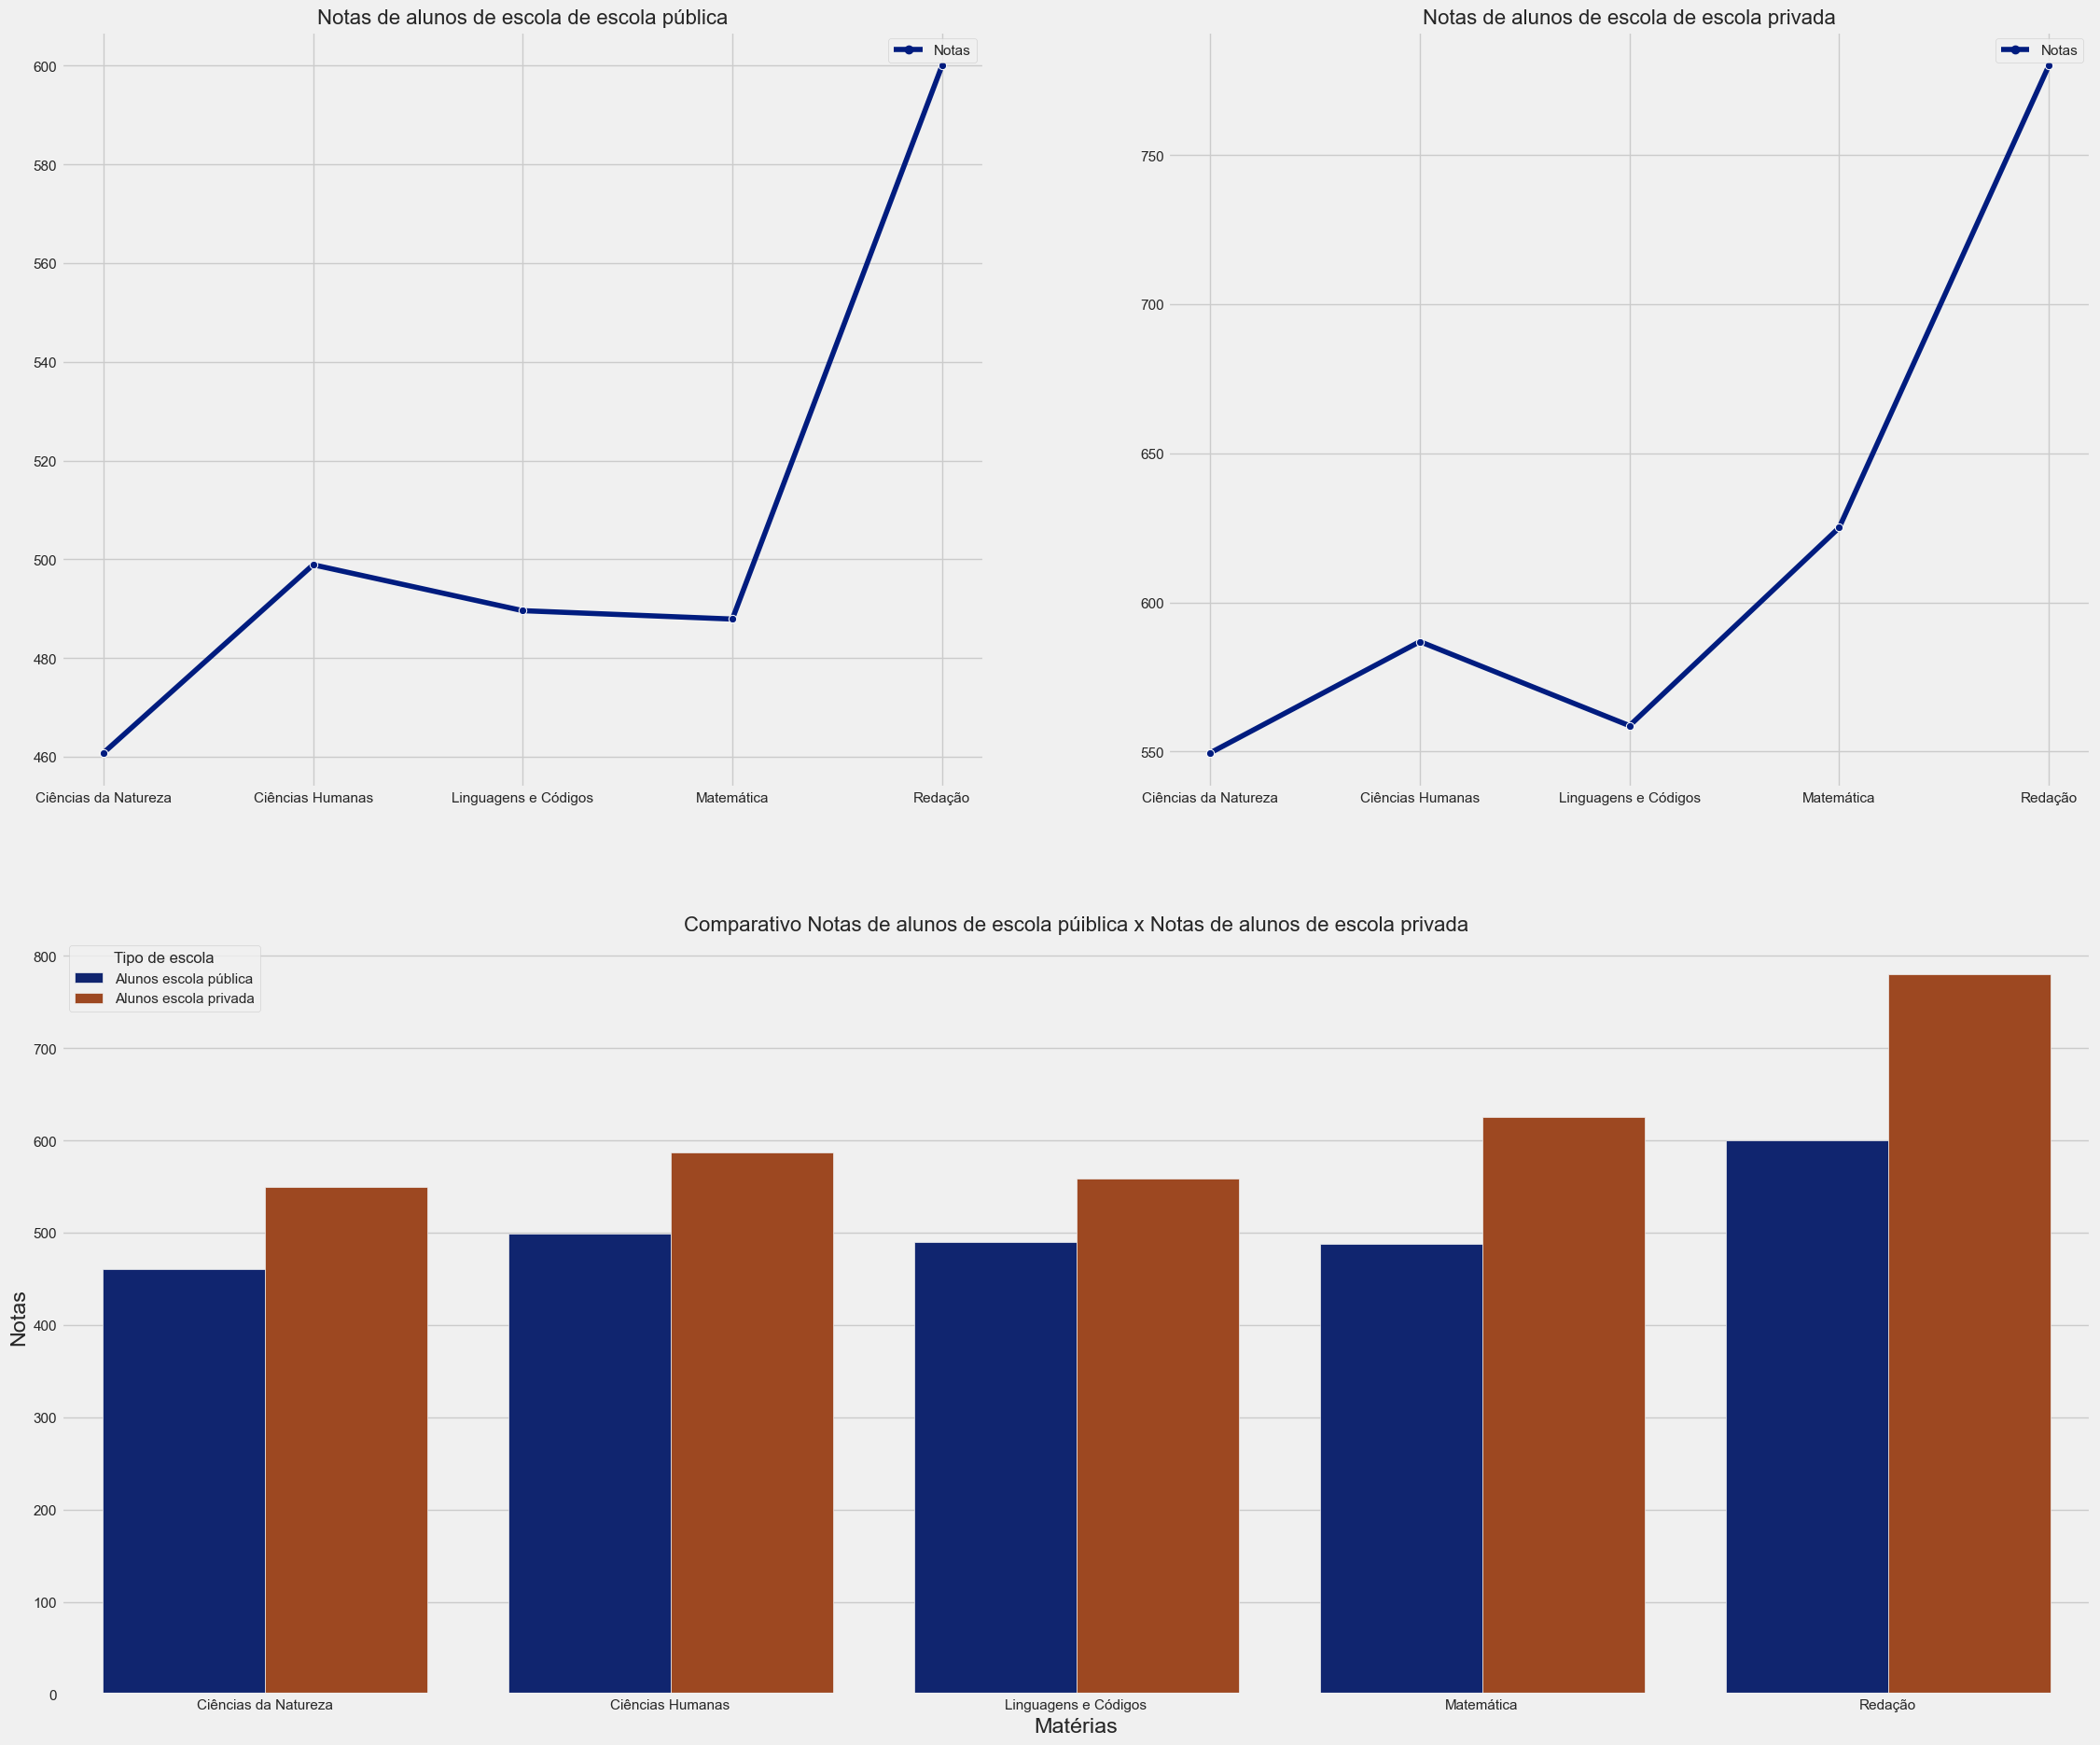

<IPython.core.display.Javascript object>

In [85]:
# Plotando as variaveis para comparação das notas
fig = plt.figure(figsize=(25,22))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
                
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, :])

sns.lineplot(data_public, palette='dark', markers=True, 
             ax=ax1).set_title('Notas de alunos de escola de escola pública', fontsize=16) #ajustar palette de cores.
sns.lineplot(data_private, palette='dark', markers=True,
             ax=ax2).set_title('Notas de alunos de escola de escola privada', fontsize=16); #ajustar palette de cores.
sns.barplot(data=data_comp_PxP.melt(
    id_vars='Matérias', value_name='Notas', 
    var_name='Tipo de escola'), x='Matérias', y='Notas', hue= 'Tipo de escola', palette='dark', ax=ax3).set_title(
    'Comparativo Notas de alunos de escola púiblica x Notas de alunos de escola privada', fontsize=16);

## RESPONDENDO AS HIPOTESES 

### H1
- Existe uma diferença significativa entre as notas de homens e mulheres

In [86]:
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif_MxF.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 2.54%


<IPython.core.display.Javascript object>

Conforme analisado nas questões 1,2,3. Podemos ver que a diferença das notas entre Homens x Mulheres não é significativa. Cerca de 2.54% de diferença média entre a pontuação dos Homens para as Mulheres.

### H2 
- Os estados da região Sul tem notas melhores ao restante do país

In [87]:
data_uf_notas[['Médias','Região']].groupby('Região').mean().sort_values('Médias', ascending=False).reset_index()

,Região,Médias
0,Sudeste,559.34
1,Sul,553.96
2,Centro Oeste,533.35
3,Nordeste,523.03
4,Norte,511.11


<IPython.core.display.Javascript object>

Como mostra o Df acima, a hipotese de que as notas da região "Sul" são maiores que o restante do país, cai por terra. Pois como visto, as maiores médias são da região "Sudeste", seguido da região "Sul".

###  H3
- Os alunos que mais faltam à prova, são os de renda familiar menor

Como previsto pela hipotese, os alunos que mais faltam às provas, são os alunos enquadrados na faixa de renda de até R$ 1100,00. (Obs: Muito devido ao fato de também ser a faixa de renda que mais se inscreve para prestar a prova).

In [88]:
dados_all_faltantes

,Faltantes Exatas,Faltantes Humanas,Renda
0,56796,48334,"Até 1.100,00"
1,32183,27316,"De 1.100,01 até 1.650,00"
2,23458,19997,"De 1.650,01 até 2.200,00"
3,13126,11025,"De 2.750,01 até 3.300,00"
4,11999,10166,Nenhuma Renda
5,11562,9847,"De 2.200,01 até 2.750,00"
6,10717,9172,"De 3.300,01 até 4.400,00"
7,8271,7027,"De 4.400,01 até 5.500,00"
8,5055,4282,"De 5.500,01 até 6.600,00"
9,3124,2647,"De 6.600,01 até 7.700,00"


<IPython.core.display.Javascript object>

### H4 
- Os alunos que fazem para valer tiram melhores notas se comparados aos treineiros

In [89]:
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 2.03%


<IPython.core.display.Javascript object>

Sim, de fato os alunos fazem a prova para valer tiram melhores notas. Mas se comparamos percentualmente, a diferença entre os dois grupos é baixissíma, cerca de 2.03% apenas.

### H5
- Alunos de escola privada possuem melhor performance na prova

Conforme exemplificado no gráfico, existe uma diferença considerável entre as notas de alunos de escola privada para alunos de escola pública, em torno de 21.83%.

In [90]:
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif_PxP.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 21.83%


<IPython.core.display.Javascript object>

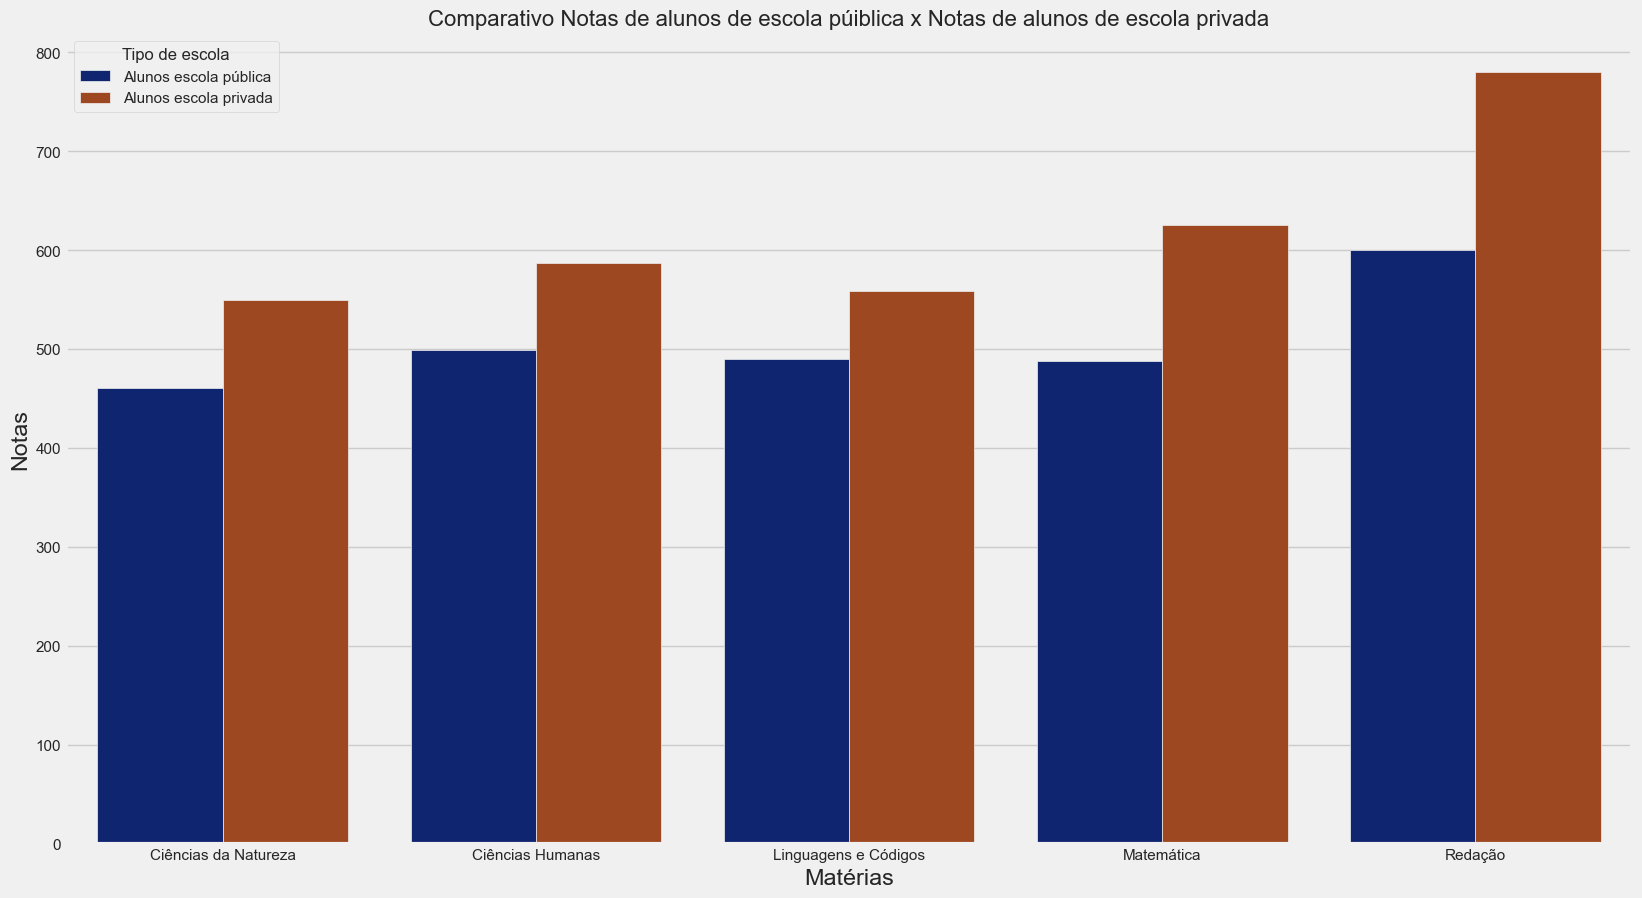

<IPython.core.display.Javascript object>

In [91]:
plt.figure(figsize=(18,10))
sns.barplot(data=data_comp_PxP.melt(id_vars='Matérias', value_name='Notas', var_name='Tipo de escola'), x='Matérias', y='Notas', hue= 'Tipo de escola', palette='dark').set_title(
    'Comparativo Notas de alunos de escola púiblica x Notas de alunos de escola privada', fontsize=16);

## INSIGHTS GERADOS DA ANÁLISE

#### - Os alunos possuem menor conhecimento na materia de Ciências da Natureza, seguido de Linguagens e Códigos, Ciências Humanas, Matemática e por fim Redação. 
#### - E mesmo a nota média da materia de Linguagens e codigos ter sido a 2° menor, isso não afetou na redação que teve a maior media de notas entre todas as matérias.
#### - A média total se somadas todas as matérias é de 536.39, o que mostra um baixo percentual de aprendizagem das matérias basicas.
#### - Conforme calculado, na maioria das notas, as pessoas do sexo feminimo se saem abaixo das pessoas do sexo masculino, principalmente nas matérias de exatas.
#### Somente na matéria de "Redação" que a medía de pontos do sexo Feminimo foi superior.
#### - Em geral alunos da região norte, obtém menores notas.
#### - Em contra partida, o Sudeste tem as maiores notas, seguido de perto pela região Sul
#### - Alunos que fizeram para valer tiram maiores notas em todas as matérias do Enem
#### - Podemos concluir que mais de 66% dos candidatos que relizam a prova, estão entre os 17 e 19 anos de idade.
#### - Pela comparação de médias entre escola pública e privada, podemos concluir que as notas de alunos de escola do tipo privada, são em média 21.83% maiores.
#### - Em geral mulheres faltam mais que os homens na prova do Enem.
#### - Por ser a faixa etária mais presente nas inscrições, os alunos de 18 anos também são os que mais faltam 
#### - Os alunos que mais faltam, estão classificados na faixa de renda de até 1100.00 e os que menos faltam estao classificados na faixa de renda de 11.000,01 at 13.200,00
#### - A faixa de renda com mais participantes é a de até 1100
#### - Apesar de nada muito expresivo, a mediana de notas dos alunos que fazem para valer é cerca de 2.03% superior aos treineiros.
#### - A faixa etária tipo 3 (18 anos) é a que mais comparece 
#### - A faixa etária com a maior média é a dos alunos com 22 anos.